# Carga de Datos

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="notebook", style="dark", palette="Set2", color_codes=True, font_scale=1.5)
plt.rcParams["figure.figsize"] = (20,8)

In [3]:
data = pd.read_csv("./data/heart_2022_no_nans.csv")
data.head(10)

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   
5  Alabama    Male          Good                 0.0               0.0   
6  Alabama  Female          Good                 3.0               0.0   
7  Alabama    Male          Fair                 5.0               0.0   
8  Alabama    Male          Good                 2.0               0.0   
9  Alabama  Female     Very good                 0.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   
5  Within past year (anytime less than 12 months ...                Yes   
6  Within past year (anytime less than 12 months ...                Yes   
7  Within past year (anytime less than 12 months ...                Yes   
8                                5 or more years ago                 No   
9  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack HadAngina HadStroke  \
0         9.0            None of them             No        No        No   
1         6.0            None of them             No        No        No   
2         8.0  6 or more, but not all             No        No        No   
3         9.0            None of them             No        No        No   
4         5.0                  1 to 5             No        No        No   
5         7.0            None of them             No        No        No   
6         8.0  6 or more, but not all             No        No       Yes   
7         8.0                  1 to 5            Yes       Yes        No   
8         6.0            None of them             No        No        No   
9         7.0            None of them             No        No        No   

  HadAsthma HadSkinCancer HadCOPD HadDepressiveDisorder HadKidneyDisease  \
0        No            No      No                    No               No   
1        No            No      No                    No               No   
2        No            No      No                    No               No   
3        No           Yes      No                   Yes               No   
4        No            No      No                    No               No   
5        No            No      No                    No               No   
6        No            No      No                    No               No   
7        No           Yes      No                    No               No   
8        No            No      No                    No               No   
9       Yes           Yes      No                    No               No   

  HadArthritis HadDiabetes DeafOrHardOfHearing BlindOrVisionDifficulty  \
0          Yes          No                  No                      No   
1          Yes         Yes                  No                      No   
2          Yes          No                  No                     Yes   
3          Yes          No                  No                      No   
4          Yes          No                  No                      No   
5           No          No                  No                      No   
6           No         Yes                  No                      No   
7          Yes         Yes                  No                      No   
8          Yes          

# Exploración/Visualización de Datos

In [4]:
pd.DataFrame(data.columns)


0
0                       State
1                         Sex
2               GeneralHealth
3          PhysicalHealthDays
4            MentalHealthDays
5             LastCheckupTime
6          PhysicalActivities
7                  SleepHours
8                RemovedTeeth
9              HadHeartAttack
10                  HadAngina
11                  HadStroke
12                  HadAsthma
13              HadSkinCancer
14                    HadCOPD
15      HadDepressiveDisorder
16           HadKidneyDisease
17               HadArthritis
18                HadDiabetes
19        DeafOrHardOfHearing
20    BlindOrVisionDifficulty
21    DifficultyConcentrating
22          DifficultyWalking
23  DifficultyDressingBathing
24          DifficultyErrands
25               SmokerStatus
26            ECigaretteUsage
27                  ChestScan
28      RaceEthnicityCategory
29                AgeCategory
30             HeightInMeters
31          WeightInKilograms
32                        BMI
33            AlcoholDrinkers
34                 HIVTesting
35               FluVaxLast12
36              PneumoVaxEver
37          TetanusLast10Tdap
38           HighRiskLastYear
39                   CovidPos

### Genero(Sex) por Categoria de Edad (AgeCategory)

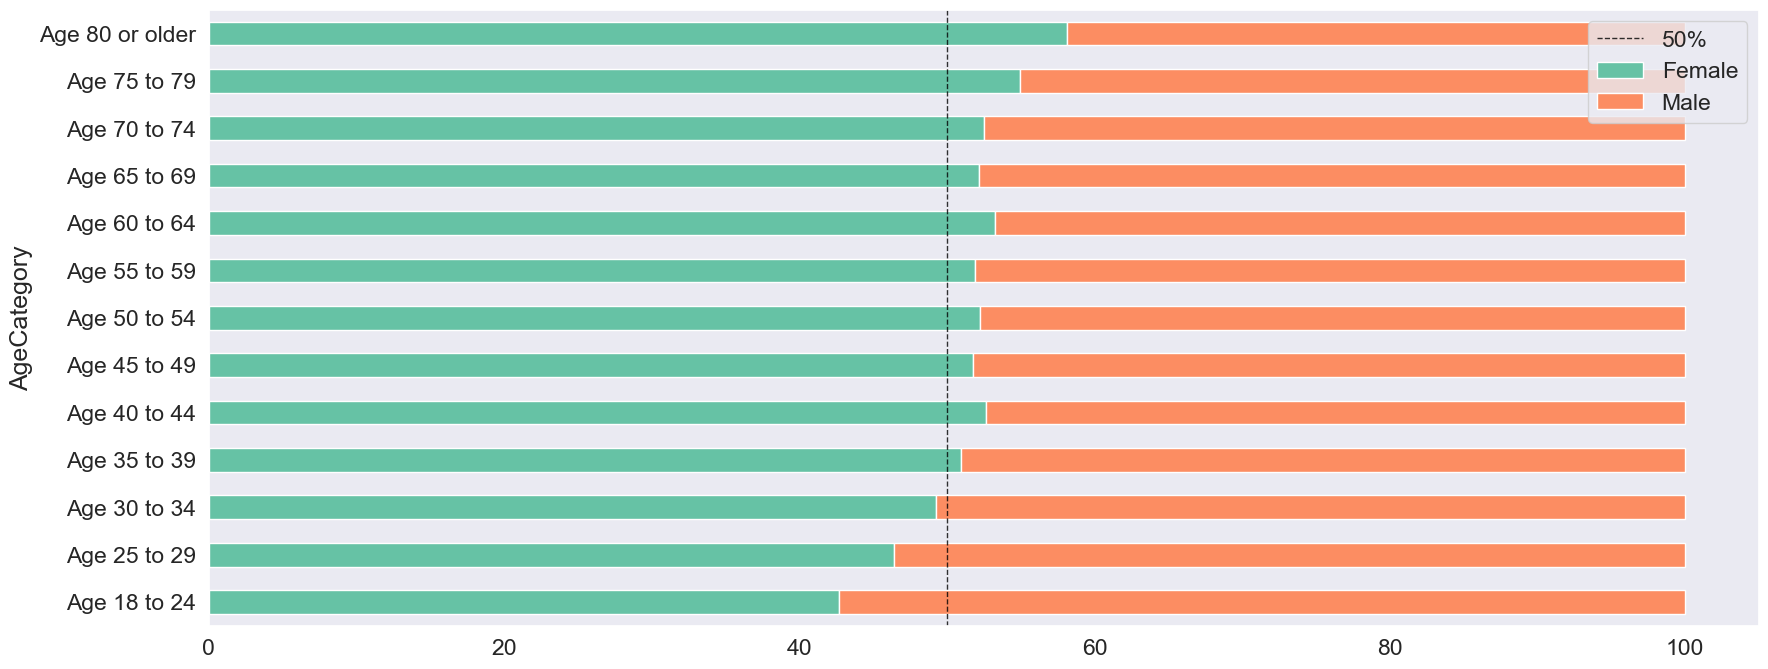

In [9]:
import seaborn as sns
fig, ax2 = plt.subplots(figsize=(20, 8))
order_of_bars_age = [
    'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 
    'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 
    'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older'
    ]
# sns.countplot(y='AgeCategory', hue="Sex", data=data, order=order_of_bars_age[::-1], ax=ax1)
total = data.groupby(['AgeCategory', 'Sex']).size().unstack(fill_value=0)
total = total.div(total.sum(axis=1), axis=0) * 100
total = total.reindex(order_of_bars_age)
ax = total.plot(kind='barh', stacked=True, ax=ax2)
ax.axvline(x=50, color='black', linestyle='--', linewidth=1, alpha=0.8, label='50%')
plt.legend()



### Relación entre peso (WeightInKilograms), altura (HeightInMeters) y el índice de masa comporal (BMI)

<Axes: xlabel='WeightInKilograms', ylabel='HeightInMeters'>

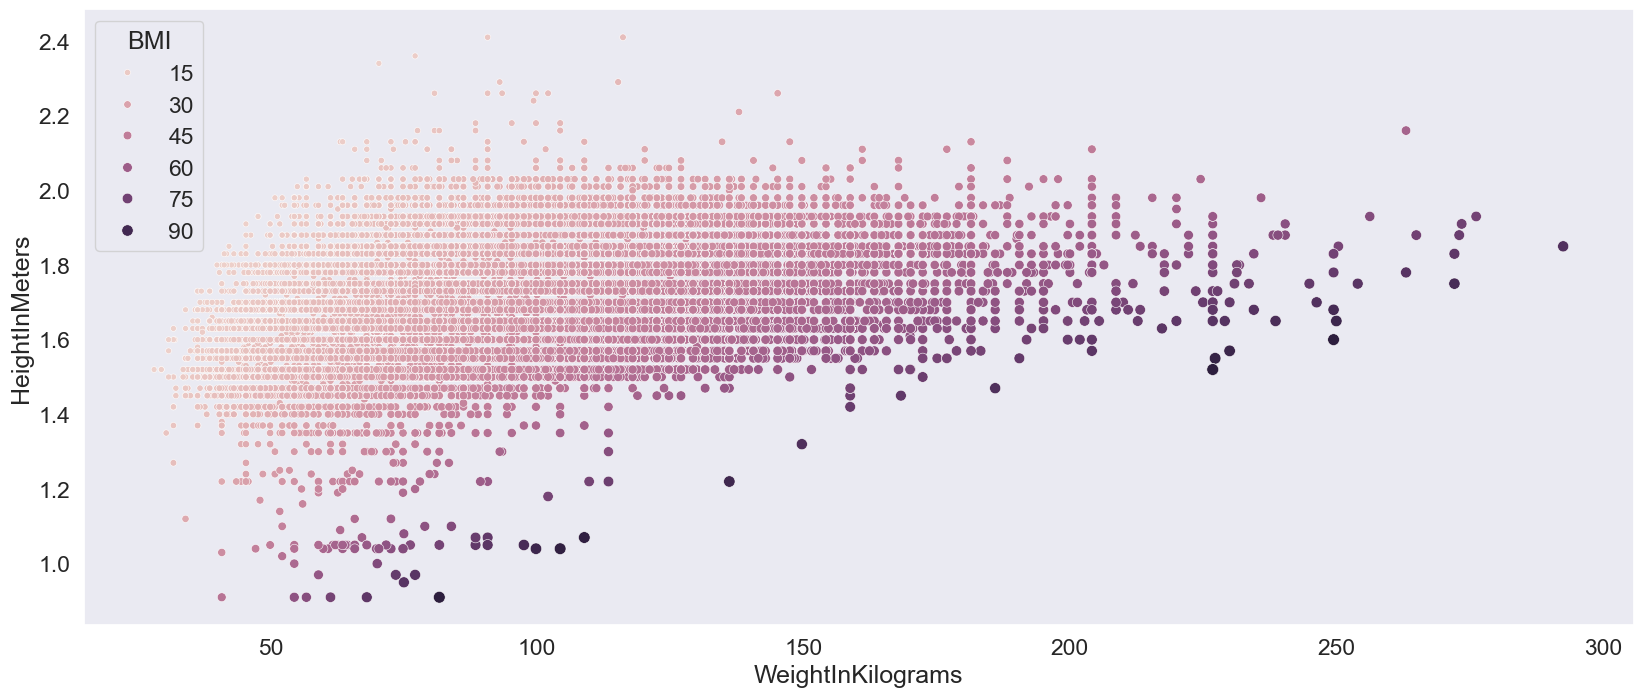

In [6]:
sns.scatterplot(data=data, y='HeightInMeters', x='WeightInKilograms', hue='BMI', size="BMI")


### Casos de BMI mayor a 30 (Obesidad)

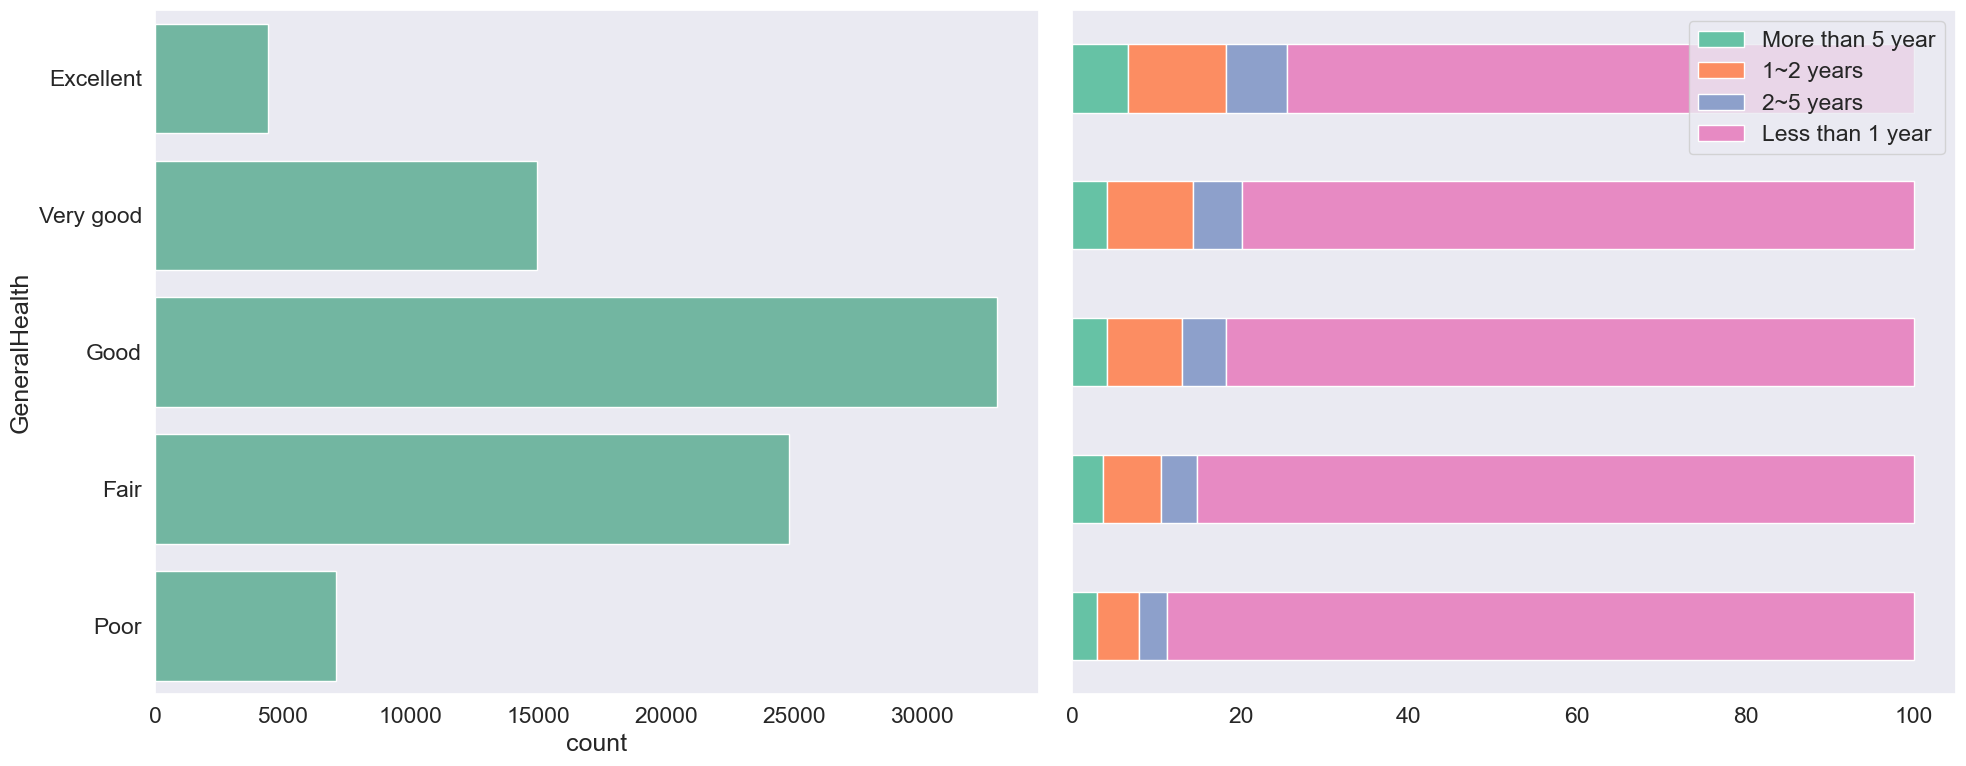

In [7]:
BMI30 = data.loc[data['BMI'] > 30 ] # Obesidad (segun fuentes)
BMI = data.loc[data['BMI'] <= 30 ]
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
order_of_bars_feel = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
legend = ['Within past year (anytime less than 12 months ago)',
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)',
       '5 or more years ago']
legend_alias = ['More than 5 year', '1~2 years', '2~5 years', 'Less than 1 year']
sns.countplot(y='GeneralHealth', data=BMI30, order=order_of_bars_feel,ax=ax1)
total = data.groupby(['GeneralHealth','LastCheckupTime']).size().unstack(fill_value=0)
total = total.div(total.sum(axis=1), axis=0) * 100
total = total.reindex(order_of_bars_feel[::-1])
total[legend]
ax = total.plot(kind='barh', stacked=True, ax=ax2)
ax2.legend(legend_alias, loc='upper right')
fig.tight_layout()



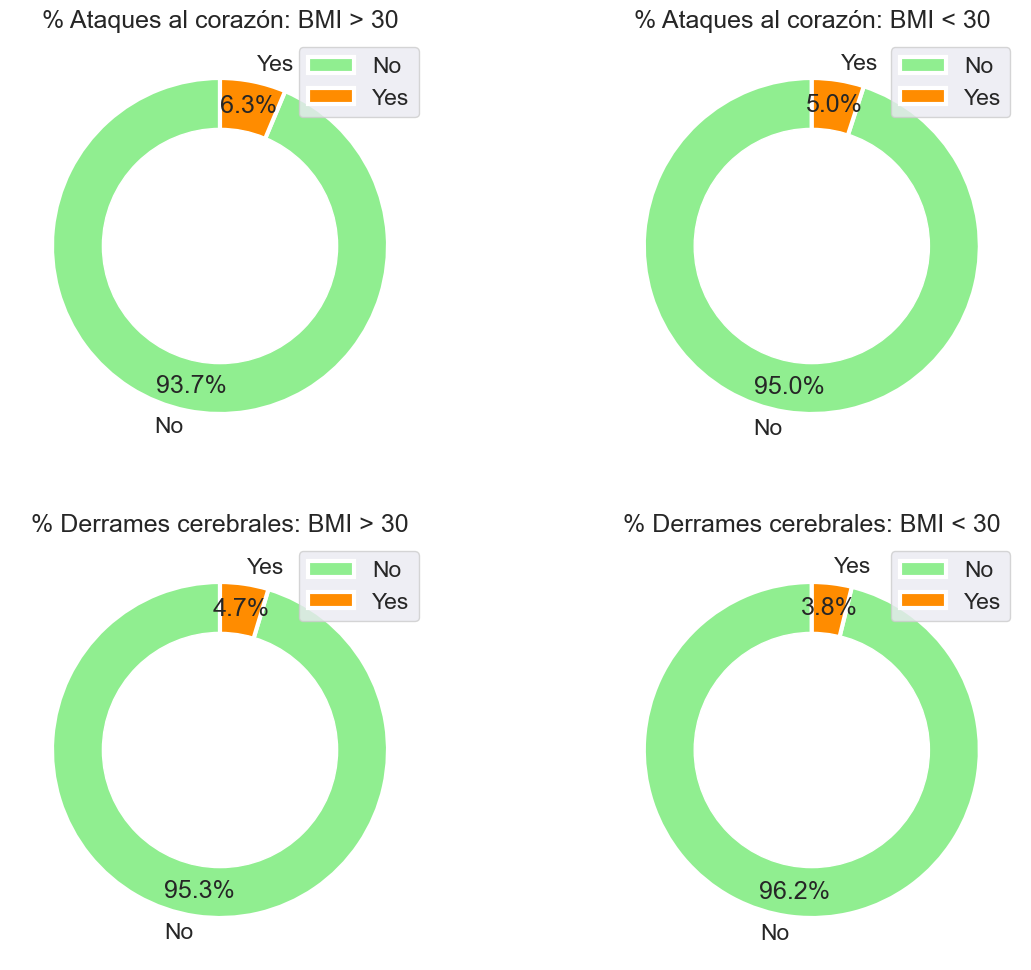

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(14,12))
colors = ['lightgreen', 'darkorange']

heart_attack = BMI30.groupby(['HadHeartAttack']).size()
ax1.pie(heart_attack, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax1.legend(labels=['No', 'Yes'], loc='upper right')
ax1.set_title('% Ataques al corazón: BMI > 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax1.add_artist(my_circle)

heart_attack = BMI.groupby(['HadHeartAttack']).size()
ax2.pie(heart_attack, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax2.legend(labels=['No', 'Yes'], loc='upper right')
ax2.set_title('% Ataques al corazón: BMI < 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax2.add_artist(my_circle)

stroke = BMI30.groupby(['HadStroke']).size()
ax3.pie(stroke, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax3.legend(labels=['No', 'Yes'], loc='upper right')
ax3.set_title('% Derrames cerebrales: BMI > 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax3.add_artist(my_circle)

stroke = BMI.groupby(['HadStroke']).size()
ax4.pie(stroke, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax4.legend(labels=['No', 'Yes'], loc='upper right')
ax4.set_title('% Derrames cerebrales: BMI < 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax4.add_artist(my_circle)

<Axes: xlabel='BMI', ylabel='Count'>

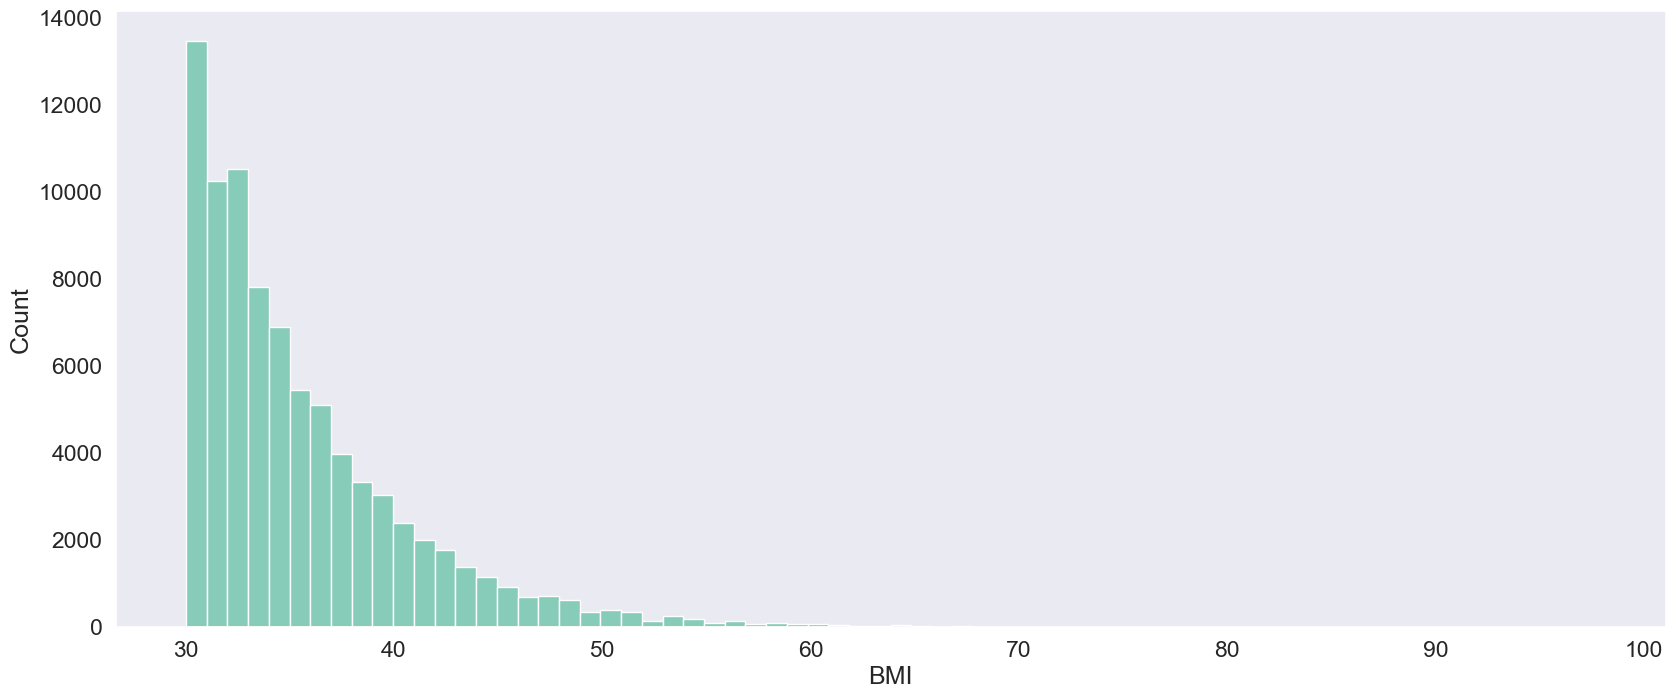

In [9]:
sns.histplot(data=BMI30, x="BMI", binwidth=1)

### Casos de 30 dias se sentirse mal (Fisica y mentalmente)

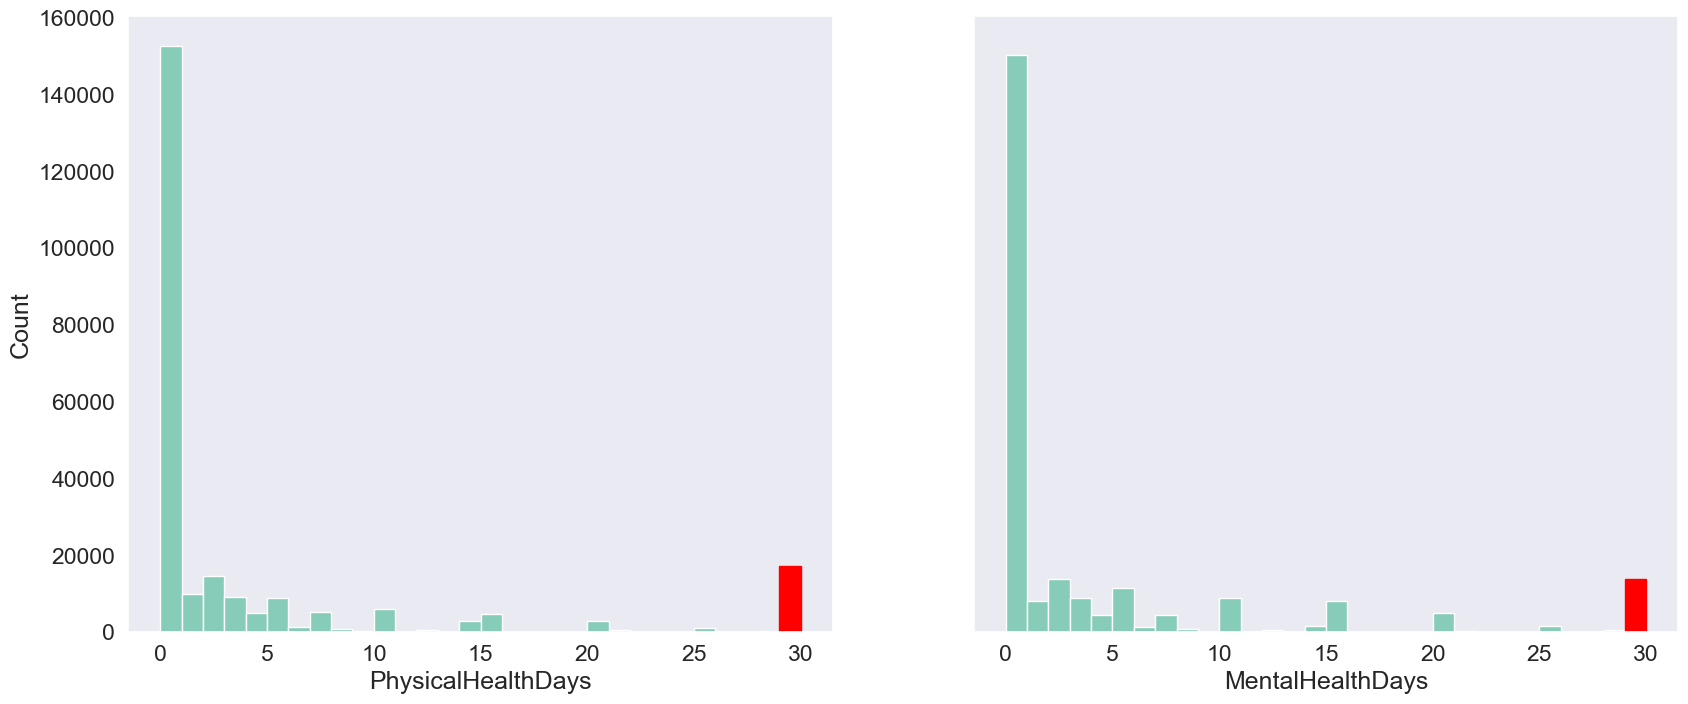

In [10]:
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True)

sns.histplot(data=data, x='PhysicalHealthDays', ax=ax1, binwidth=1)
sns.histplot(data=data, x='MentalHealthDays', ax=ax2, binwidth=1)

for bar in ax1.patches:
    if bar.get_x() <= 29 < bar.get_x() + bar.get_width():
        bar.set_color('red')
for bar in ax2.patches:
    if bar.get_x() <= 29 < bar.get_x() + bar.get_width():
        bar.set_color('red')

In [11]:
PLUS30 = data.loc[data["PhysicalHealthDays"] >= 29]
PLUS30 = PLUS30.loc[PLUS30["MentalHealthDays"] >= 29]

MINUS30 = data.loc[data["PhysicalHealthDays"] < 29]
MINUS30 = MINUS30.loc[MINUS30["MentalHealthDays"] < 29]

Text(0.5, 0, 'Actividades físicas')

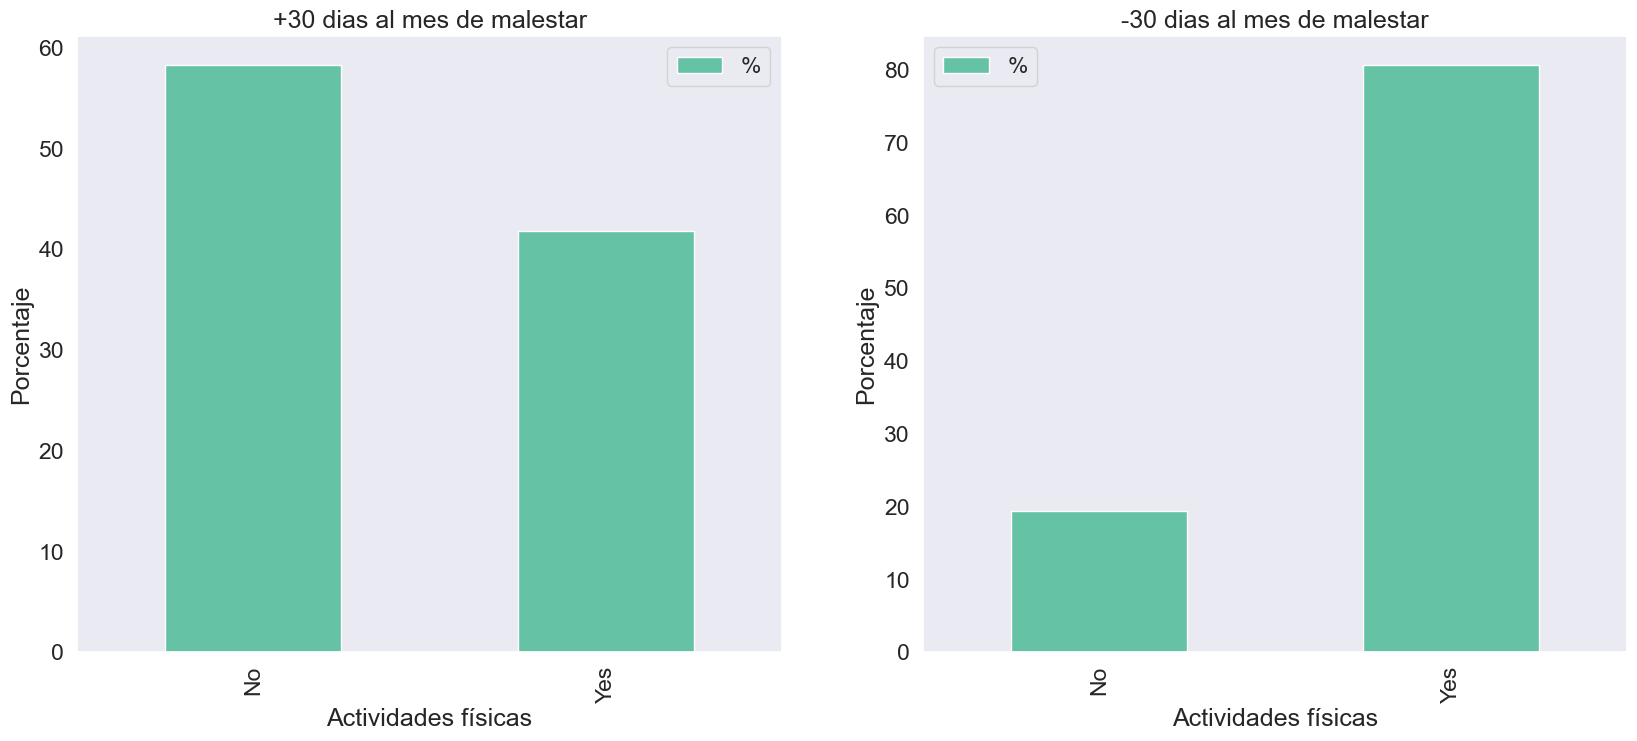

In [12]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
ax1.set_title("+30 dias al mes de malestar")
ax2.set_title("-30 dias al mes de malestar")
PLUS30['Total'] = 1
grouped_data = PLUS30[['PhysicalActivities', 'Total']].groupby(['PhysicalActivities']).sum()
grouped_data['GrandTotal'] = PLUS30['Total'].sum()
grouped_data['%'] = grouped_data['Total'] / grouped_data['GrandTotal'] * 100
grouped_data.plot(kind='bar', y='%', ax=ax1)
ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Actividades físicas')

MINUS30['Total'] = 1
grouped_data = MINUS30[['PhysicalActivities', 'Total']].groupby(['PhysicalActivities']).sum()
grouped_data['GrandTotal'] = MINUS30['Total'].sum()
grouped_data['%'] = grouped_data['Total'] / grouped_data['GrandTotal'] * 100
grouped_data.plot(kind='bar', y='%', ax=ax2)
ax2.set_ylabel('Porcentaje')
ax2.set_xlabel('Actividades físicas')

Text(0.5, 0, 'Horas de sueño')

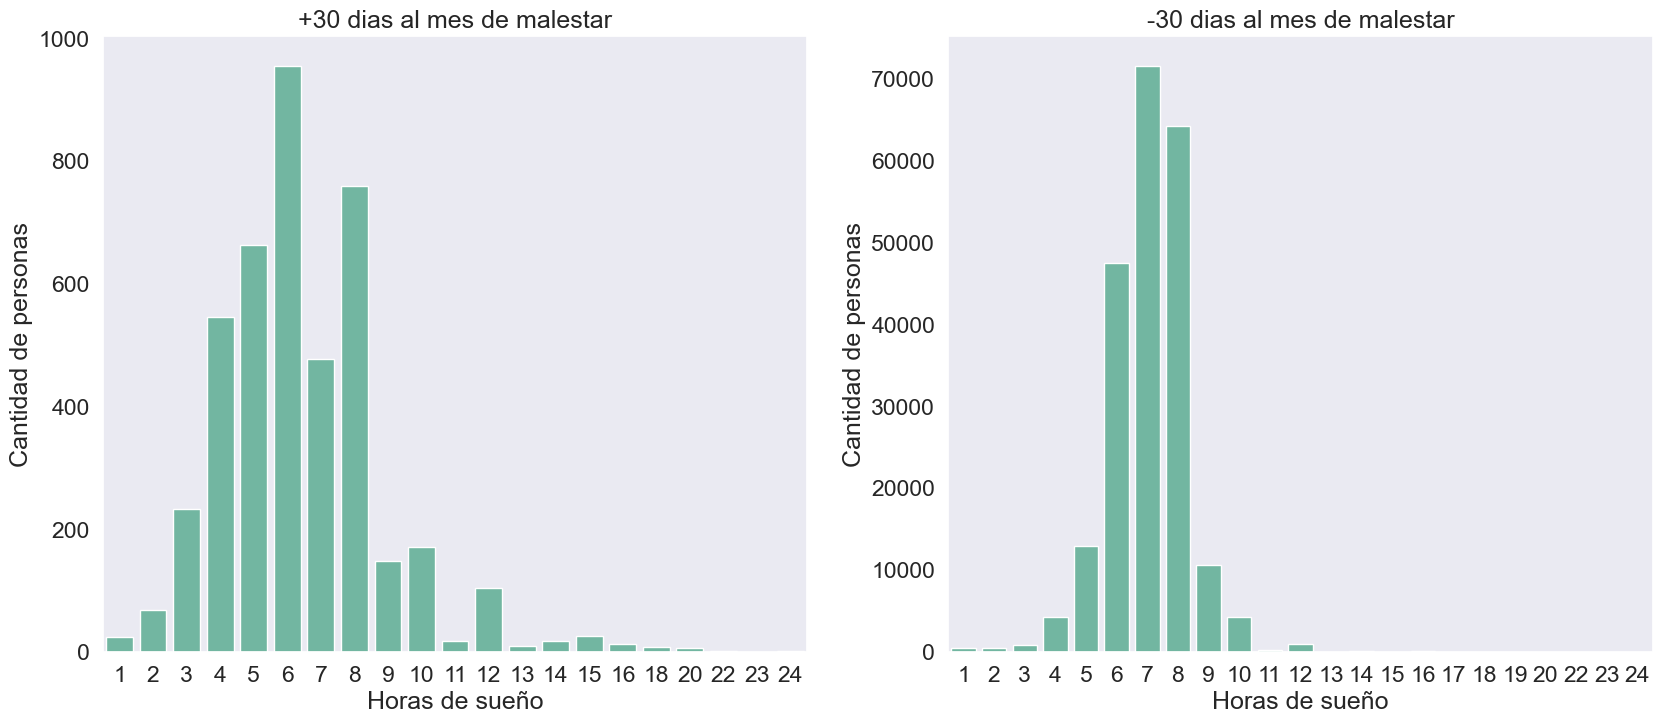

In [19]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
ax1.set_title("+30 dias al mes de malestar")
ax2.set_title("-30 dias al mes de malestar")
PLUS30['SleepHours'] = PLUS30['SleepHours'].astype(int)
MINUS30['SleepHours'] = MINUS30['SleepHours'].astype(int)
sns.countplot(data=PLUS30, x="SleepHours", ax=ax1)
sns.countplot(data=MINUS30, x="SleepHours", ax=ax2)
ax1.set_ylabel('Cantidad de personas')
ax2.set_ylabel('Cantidad de personas')
ax1.set_xlabel('Horas de sueño')
ax2.set_xlabel('Horas de sueño')

In [ ]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20,22))


ax1.set_title("+20 dias al mes de malestar")
sns.countplot(data=PLUS30, x="PhysicalActivities", ax=ax1, color='orange')
sns.countplot(data=PLUS30, x="SleepHours", ax=ax3, color='orange')
sns.histplot(data=PLUS30, x="BMI", ax=ax5, binwidth=4, color='orange')
# sns.countplot(data=PLUS30, y="AgeCategory", ax=ax7, order=order_of_bars_age, color='orange')

ax2.set_title("-20 dias al mes de malestar")
sns.countplot(data=MINUS30, x="PhysicalActivities", ax=ax2, order=['No', 'Yes'])
sns.countplot(data=MINUS30, x="SleepHours", ax=ax4)
sns.histplot(data=MINUS30, x="BMI", ax=ax6, binwidth=4)
# sns.countplot(data=MINUS30, y="AgeCategory", ax=ax8, order=order_of_bars_age)

ax5.sharex(ax6)

### Jovenes con mas dias de malestar mental

PhysicalHealthDays  MentalHealthDays  TotalDays  \
AgeCategory                                                        
Age 18 to 24                33793.0           98632.0   132425.0   
Age 25 to 29                28709.0           73341.0   102050.0   
Age 30 to 34                38871.0           82983.0   121854.0   
Age 35 to 39                46158.0           86532.0   132690.0   
Age 40 to 44                58034.0           89336.0   147370.0   
Age 45 to 49                63711.0           80879.0   144590.0   
Age 50 to 54                84874.0           91579.0   176453.0   
Age 55 to 59               107393.0           94551.0   201944.0   
Age 60 to 64               131382.0           99006.0   230388.0   
Age 65 to 69               126267.0           83004.0   209271.0   
Age 70 to 74               117271.0           68191.0   185462.0   
Age 75 to 79                87621.0           42771.0   130392.0   
Age 80 or older             89287.0           34403.0   123690.0   

                 PhysicalHealthDays %  MentalHealthDays %  
AgeCategory                                                
Age 18 to 24                25.518595           74.481405  
Age 25 to 29                28.132288           71.867712  
Age 30 to 34                31.899650           68.100350  
Age 35 to 39                34.786344           65.213656  
Age 40 to 44                39.379792           60.620208  
Age 45 to 49                44.063213           55.936787  
Age 50 to 54                48.100061           51.899939  
Age 55 to 59                53.179594           46.820406  
Age 60 to 64                57.026408           42.973592  
Age 65 to 69                60.336597           39.663403  
Age 70 to 74                63.231821           36.768179  
Age 75 to 79                67.198141           32.801859  
Age 80 or older             72.186110           27.813890

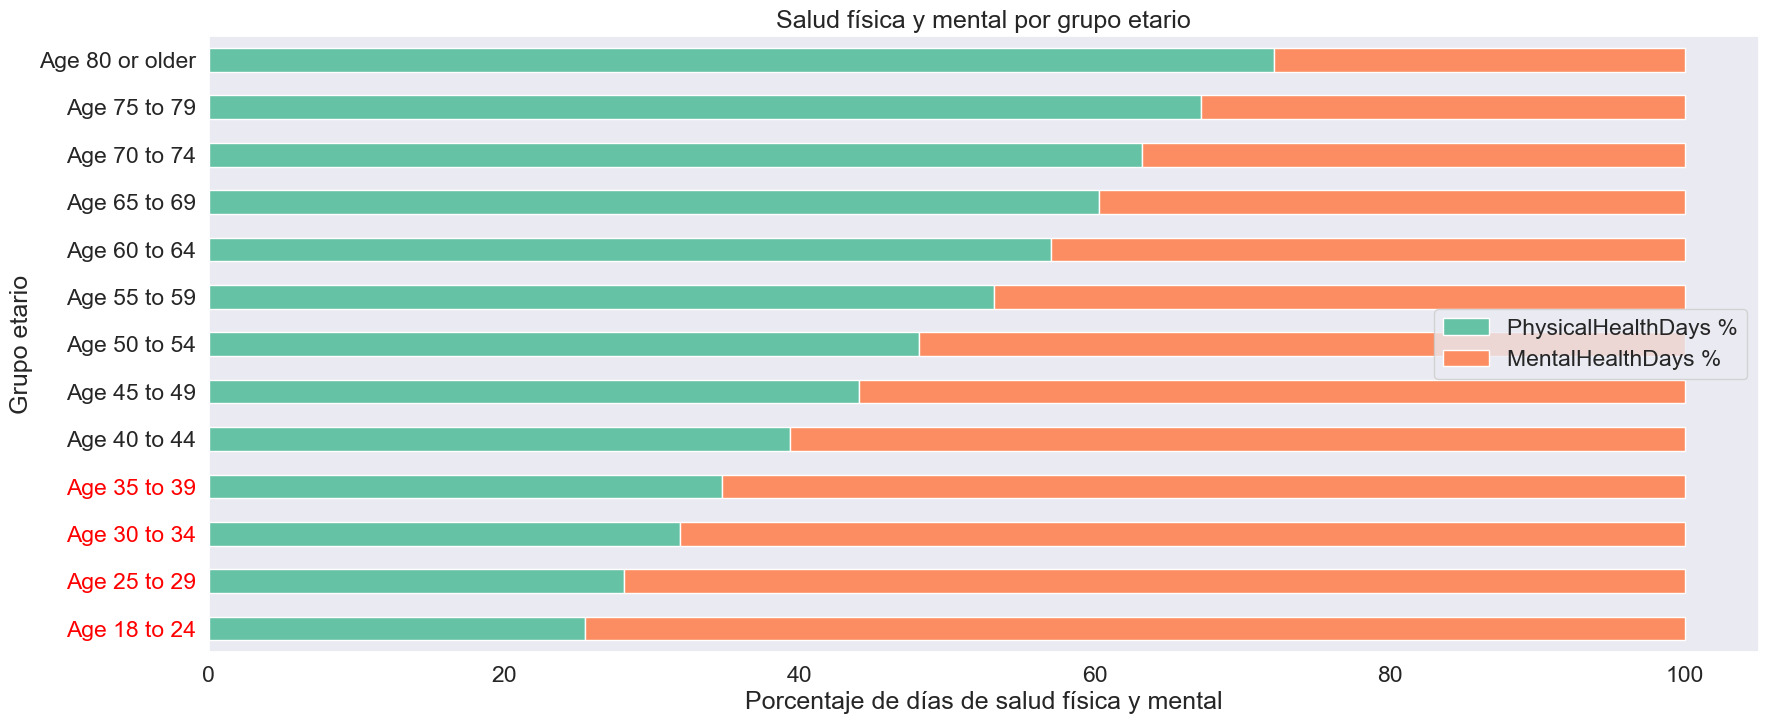

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1)
small_data = data[["AgeCategory", "PhysicalHealthDays", "MentalHealthDays"]]
grouped_data = small_data.groupby('AgeCategory').sum()
grouped_data["TotalDays"] = grouped_data["PhysicalHealthDays"] + grouped_data["MentalHealthDays"]
grouped_data["PhysicalHealthDays %"] = grouped_data["PhysicalHealthDays"] / grouped_data["TotalDays"] * 100
grouped_data["MentalHealthDays %"] = grouped_data["MentalHealthDays"] / grouped_data["TotalDays"] * 100

grouped_data[["PhysicalHealthDays %", "MentalHealthDays %"]].plot(kind="barh", stacked=True, ax=ax)
ax.set_xlabel("Porcentaje de días de salud física y mental")
ax.set_ylabel("Grupo etario")
ax.set_title("Salud física y mental por grupo etario")

jovenes = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39']
yticklabels = ax.get_yticklabels()
for label in yticklabels:
    if label.get_text() in jovenes:
        label.set_color('red')
grouped_data

C:\Users\Seidor\AppData\Local\Temp\ipykernel_4852\1496219151.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_data['Total'] = 1
C:\Users\Seidor\AppData\Local\Temp\ipykernel_4852\1496219151.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_data['Total'] = 1


Text(0.5, 0, 'Tuvieron Depresión')

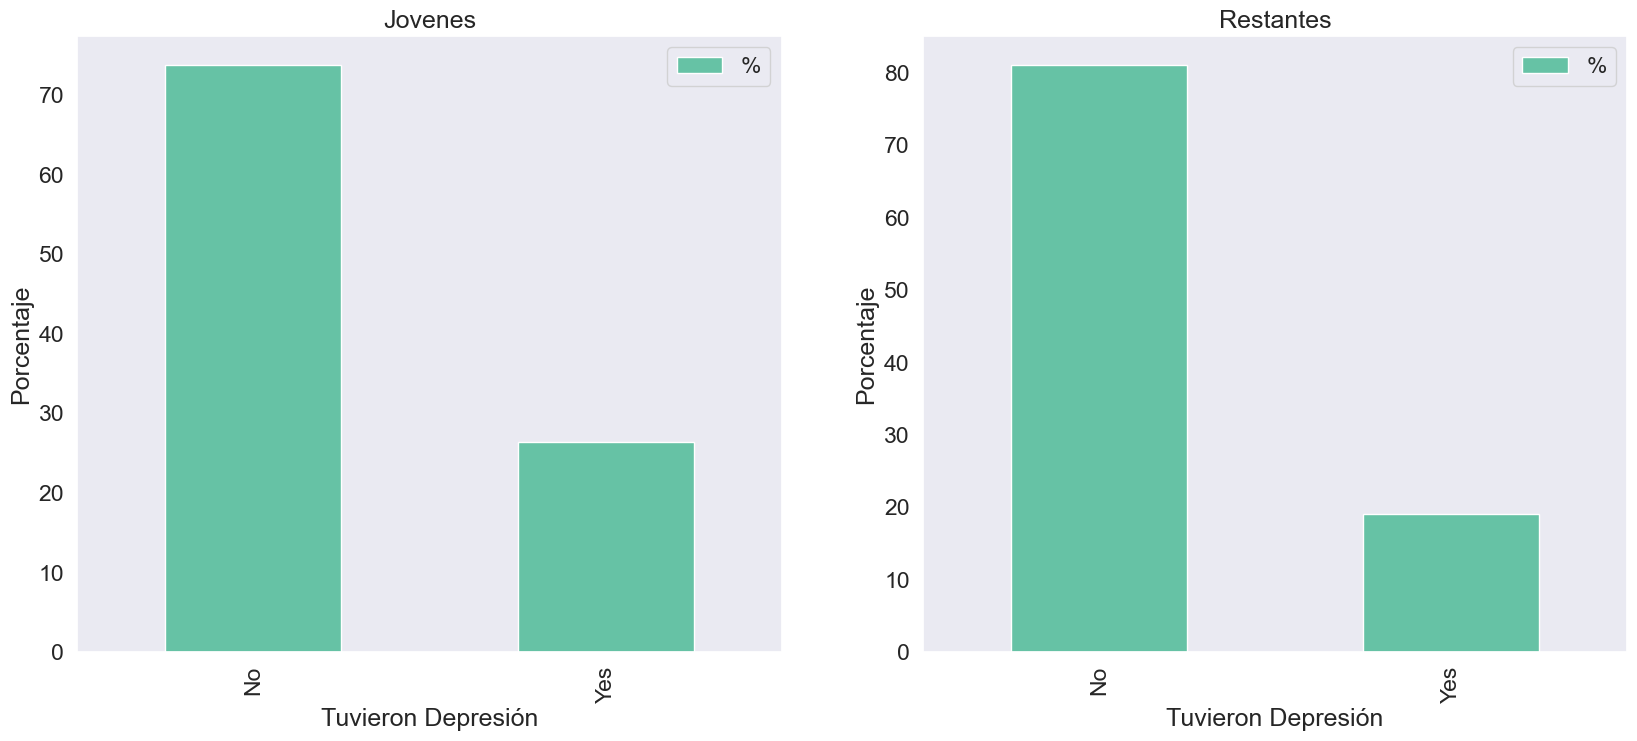

In [87]:
young_data = data.loc[data['AgeCategory'].isin(jovenes)]
rest_data = data.loc[~data['AgeCategory'].isin(jovenes)]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))

young_data['Total'] = 1
grouped_data = young_data[['HadDepressiveDisorder', 'Total']].groupby(['HadDepressiveDisorder']).sum()
grouped_data['GrandTotal'] = young_data['Total'].sum()
grouped_data['%'] = grouped_data['Total'] / grouped_data['GrandTotal'] * 100
grouped_data.plot(kind='bar', y='%', ax=ax1)

rest_data['Total'] = 1
grouped_data = rest_data[['HadDepressiveDisorder', 'Total']].groupby(['HadDepressiveDisorder']).sum()
grouped_data['GrandTotal'] = rest_data['Total'].sum()
grouped_data['%'] = grouped_data['Total'] / grouped_data['GrandTotal'] * 100
grouped_data.plot(kind='bar', y='%', ax=ax2)

ax1.set_ylabel('Porcentaje')
ax2.set_ylabel('Porcentaje')
ax1.set_title("Jovenes")
ax2.set_title("Restantes")
ax1.set_xlabel('Tuvieron Depresión')
ax2.set_xlabel('Tuvieron Depresión')

C:\Users\Seidor\AppData\Local\Temp\ipykernel_4852\2600329055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_data['Total'] = 1
C:\Users\Seidor\AppData\Local\Temp\ipykernel_4852\2600329055.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_data['Total'] = 1


Text(0.5, 0, 'Sexo')

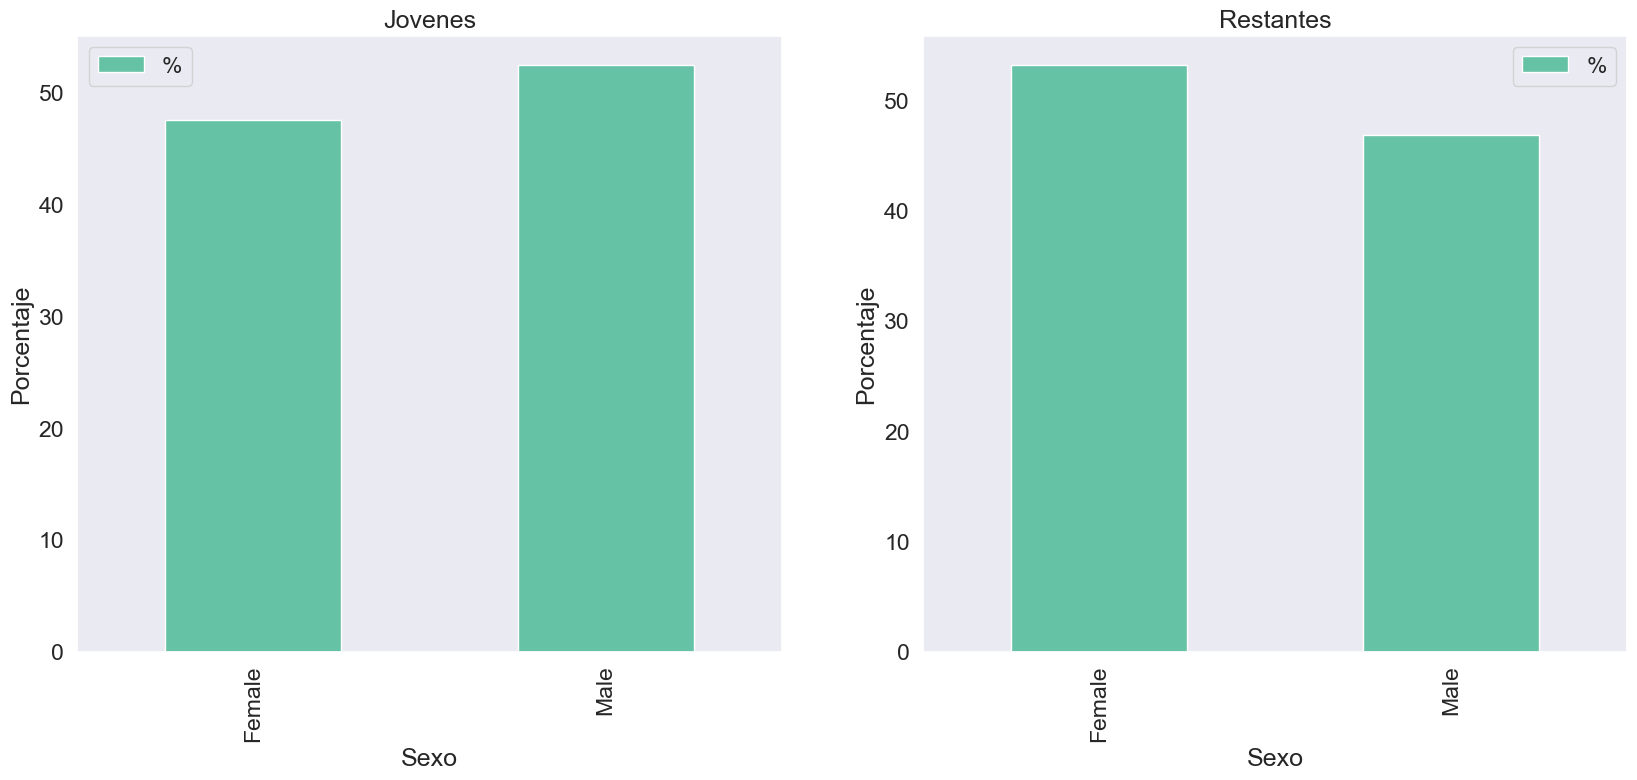

In [186]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))
young_data['Total'] = 1
grouped_data = young_data[['Sex', 'Total']].groupby(['Sex']).sum()
grouped_data['GrandTotal'] = young_data['Total'].sum()
grouped_data['%'] = grouped_data['Total'] / grouped_data['GrandTotal'] * 100
grouped_data.plot(kind='bar', y='%', ax=ax1)
rest_data['Total'] = 1
grouped_data = rest_data[['Sex', 'Total']].groupby(['Sex']).sum()
grouped_data['GrandTotal'] = rest_data['Total'].sum()
grouped_data['%'] = grouped_data['Total'] / grouped_data['GrandTotal'] * 100
grouped_data.plot(kind='bar', y='%', ax=ax2)

ax1.set_ylabel('Porcentaje')
ax2.set_ylabel('Porcentaje')
ax1.set_title("Jovenes")
ax2.set_title("Restantes")
ax1.set_xlabel('Sexo')
ax2.set_xlabel('Sexo')
# ax1.set_xticklabels(['F', 'M'])
# ax2.set_xticklabels(['F', 'M'])

C:\Users\Seidor\AppData\Local\Temp\ipykernel_4852\298751769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_data['Total'] = 1
C:\Users\Seidor\AppData\Local\Temp\ipykernel_4852\298751769.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_data['Total'] = 1


[Text(0, 0, 'Excellent'),
 Text(0, 1, 'Very Good'),
 Text(0, 2, 'Good'),
 Text(0, 3, 'Fair'),
 Text(0, 4, 'Poor')]

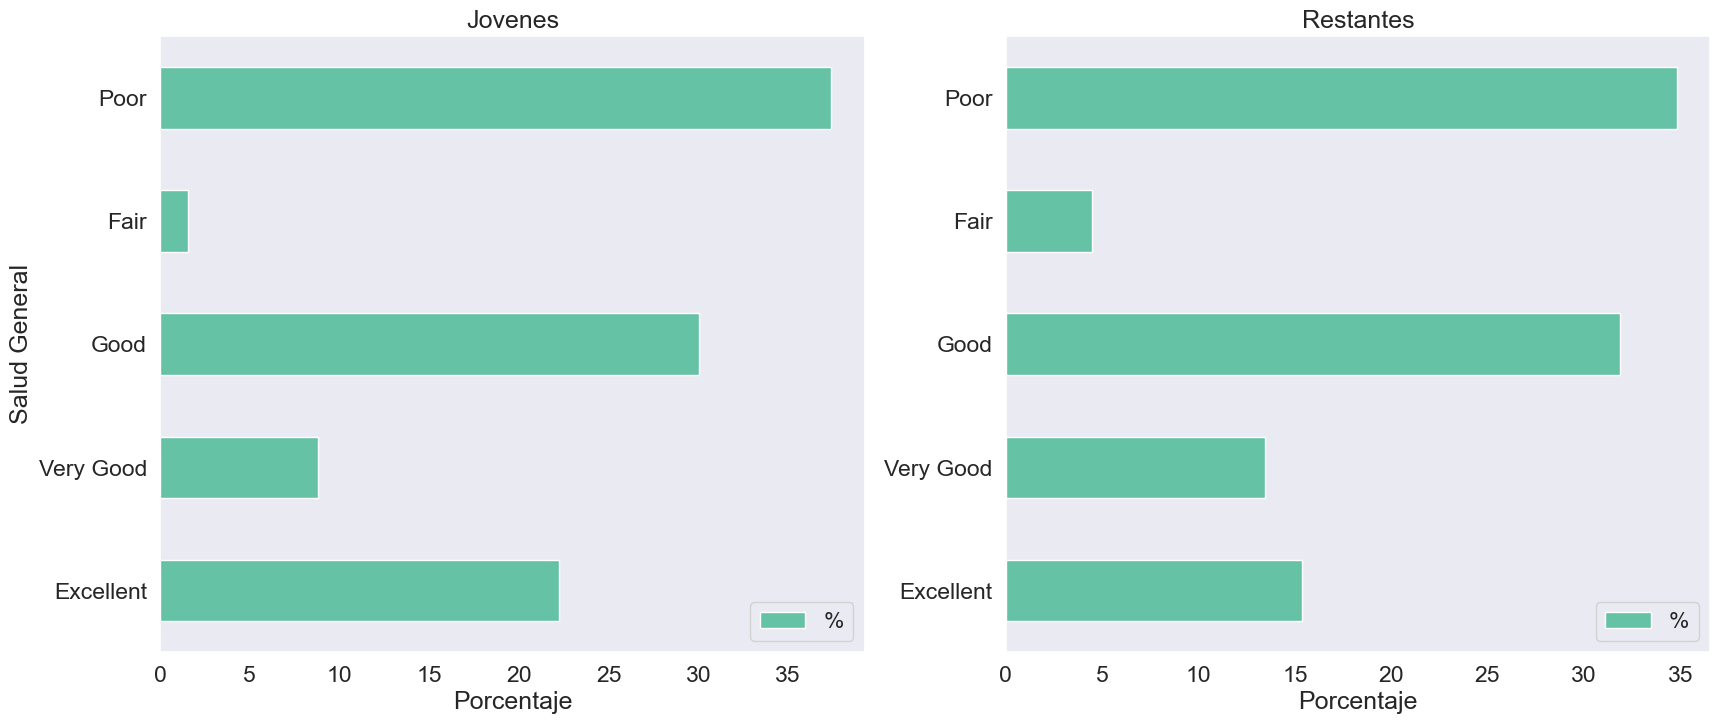

In [98]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))
order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
young_data['Total'] = 1
grouped_data = young_data[['GeneralHealth', 'Total']].groupby(['GeneralHealth']).sum()
grouped_data['GrandTotal'] = young_data['Total'].sum()
grouped_data['%'] = grouped_data['Total'] / grouped_data['GrandTotal'] * 100
grouped_data.plot(kind='barh', y='%', ax=ax1)
rest_data['Total'] = 1
grouped_data = rest_data[['GeneralHealth', 'Total']].groupby(['GeneralHealth']).sum()
grouped_data['GrandTotal'] = rest_data['Total'].sum()
grouped_data['%'] = grouped_data['Total'] / grouped_data['GrandTotal'] * 100
grouped_data.plot(kind='barh', y='%', ax=ax2)

ax1.set_xlabel('Porcentaje')
ax2.set_xlabel('Porcentaje')
ax1.set_title("Jovenes")
ax2.set_title("Restantes")
ax1.set_ylabel('Salud General')
ax2.set_ylabel('')
ax1.set_yticklabels(order)
ax2.set_yticklabels(order)


# Analisis Estadístico

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# quito las columnas innecesarias
drop_columns = ["State", "LastCheckupTime", "RemovedTeeth", "ChestScan", "SmokerStatus", "HadDiabetes", "ECigaretteUsage", "RaceEthnicityCategory", "BMI", "TetanusLast10Tdap", "CovidPos", "FluVaxLast12", "PneumoVaxEver"]
model_data = data.drop(columns=drop_columns)
# convierto las columnas Yes/No a binarias
yes_no_columns = [col for col in model_data.columns if data[col].isin(['Yes', 'No']).any()]
model_data[yes_no_columns] = model_data[yes_no_columns].replace({'Yes': 1, 'No': 0})

# convierto dos columnas categoricas a columnas binarias
new_cols = pd.DataFrame()
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(model_data[['GeneralHealth']])
encoded_cols = encoder.transform(model_data[['GeneralHealth']])
encoded_data = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['GeneralHealth']))
new_cols = pd.concat([new_cols, encoded_data], axis=1)
model_data = pd.concat([model_data, new_cols], axis=1)

new_cols = pd.DataFrame()
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(model_data[['Sex']])
encoded_cols = encoder.transform(model_data[['Sex']])
encoded_data = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Sex']))
new_cols = pd.concat([new_cols, encoded_data], axis=1)
model_data = pd.concat([model_data, new_cols], axis=1)
# me quedo con las categorias etareas menores
model_data = model_data.loc[model_data["AgeCategory"] < "Age 40 to 44"]
# model_data["y"] = model_data["HadDepressiveDisorder"]
# model_data.drop(columns=["GeneralHealth", "Sex", "AgeCategory", "HadDepressiveDisorder"], inplace=True)

model_data

Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
75      Female     Very good                 0.0               0.0   
312     Female          Fair                 0.0              30.0   
445     Female          Good                 0.0               0.0   
450       Male     Very good                 7.0               7.0   
451       Male     Excellent                 0.0               0.0   
...        ...           ...                 ...               ...   
245997  Female          Good                 4.0               3.0   
245998  Female          Good                 2.0              10.0   
246005  Female     Excellent                 0.0               0.0   
246013    Male     Excellent                 0.0               7.0   
246018  Female          Fair                 0.0               7.0   

        PhysicalActivities  SleepHours  HadHeartAttack  HadAngina  HadStroke  \
75                       0         5.0               0          0          0   
312                      0         6.0               1          0          0   
445                      1         4.0               0          0          0   
450                      1         6.0               0          0          0   
451                      1         7.0               0          0          0   
...                    ...         ...             ...        ...        ...   
245997                   1         5.0               0          0          0   
245998                   1         7.0               0          0          0   
246005                   1         8.0               0          0          0   
246013                   0         4.0               0          0          0   
246018                   1         7.0               0          0          0   

        HadAsthma  HadSkinCancer  HadCOPD  HadDepressiveDisorder  \
75              0              0        0                      0   
312             0              0        0                      0   
445             0              0        0                      1   
450             0              0        0                      0   
451             0              0        0                      0   
...           ...            ...      ...                    ...   
245997          0              0        0                      0   
245998          0              0        0                      0   
246005          0              0        0                      0   
246013          0              0        0                      1   
246018          0              0        0                      1   

        HadKidneyDisease  HadArthritis  DeafOrHardOfHearing  \
75                     0             0                    0   
312                    0             1                    0   
445                    0             0                    0   
450                    0             0                    0   
451                    0             0                    0   
...                  ...           ...                  ...   
245997                 0             1                    0   
245998                 0             0                    0   
246005                 0             0                    0   
246013                 0             0                    0   
246018                 0             0                    0   

        BlindOrVisionDifficulty  DifficultyConcentrating  DifficultyWalking  \
75                            0                        0                  0   
312                           0                        1                  0   
445                           0                        0                  0   
450                           0                        0                  0   
451                           0                        0                  0   
...                         ...                      ...                ...   
245997                        0                        0                  0   
245

### Implementación del método PCA

In [6]:
x = model_data.drop(["GeneralHealth", "Sex", "AgeCategory", "HadDepressiveDisorder"], axis=1)
y = model_data["HadDepressiveDisorder"]
nombres = x.columns

print("x: ", x.shape)
print("y: ", y.shape)
nombres

x:  (53191, 30)
y:  (53191,)


Index(['PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities',
       'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadKidneyDisease', 'HadArthritis',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'HeightInMeters',
       'WeightInKilograms', 'AlcoholDrinkers', 'HIVTesting',
       'HighRiskLastYear', 'GeneralHealth_Excellent', 'GeneralHealth_Fair',
       'GeneralHealth_Good', 'GeneralHealth_Poor', 'GeneralHealth_Very good',
       'Sex_Female', 'Sex_Male'],
      dtype='object')

In [7]:
# estandarizo los valores de las X´s
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [8]:
pca = PCA()
pca.fit(x_scaled, y)
x_pca = pca.transform(x_scaled)

[0.11, 0.091, 0.051, 0.049, 0.043, 0.043, 0.039, 0.036, 0.035, 0.034, 0.033, 0.033, 0.032, 0.031, 0.031, 0.03, 0.029, 0.029, 0.028, 0.027, 0.027, 0.026, 0.025, 0.021, 0.02, 0.019, 0.018, 0.012, 0.0, 0.0]


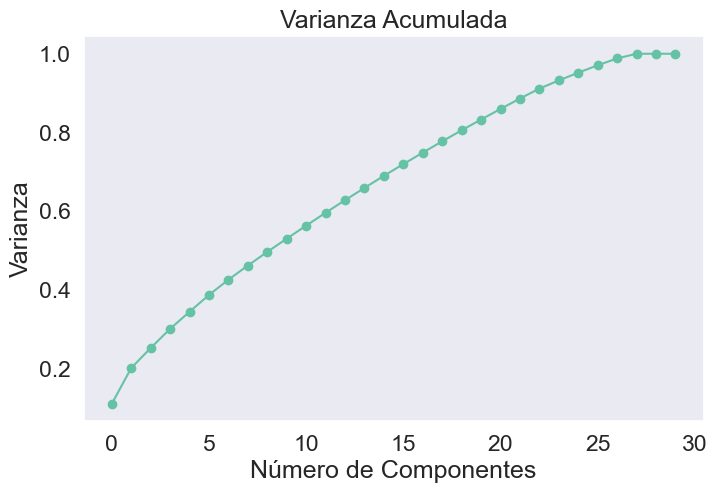

In [9]:
print([round(x,3) for x in pca.explained_variance_ratio_])
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza')
plt.title('Varianza Acumulada')
plt.show()

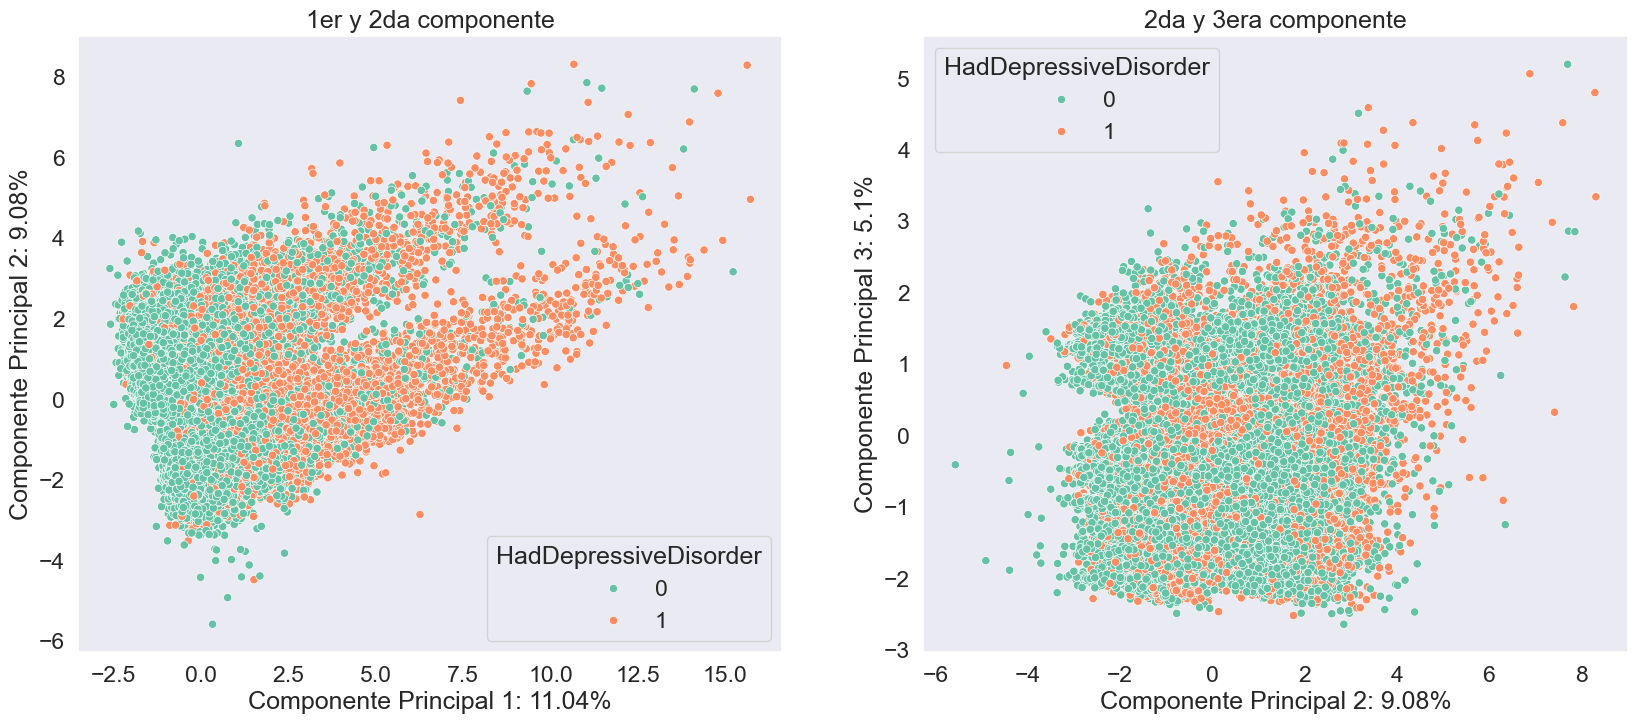

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=y, alpha=1, ax=ax1)
vars = pca.explained_variance_ratio_
var1 = round(100*vars[0],2)
var2 = round(100*vars[1],2)
ax1.set_xlabel("Componente Principal {}: {}%".format(1, var1))
ax1.set_ylabel("Componente Principal {}: {}%".format(2, var2))
ax1.set_title("1er y 2da componente")
plt.grid()

sns.scatterplot(x=x_pca[:,1], y=x_pca[:,2], hue=y, alpha=1, ax=ax2)
vars = pca.explained_variance_ratio_
var1 = round(100*vars[1],2)
var2 = round(100*vars[2],2)
ax2.set_xlabel("Componente Principal {}: {}%".format(2, var1))
ax2.set_ylabel("Componente Principal {}: {}%".format(3, var2))
ax2.set_title("2da y 3era componente")
plt.grid()
plt.show()

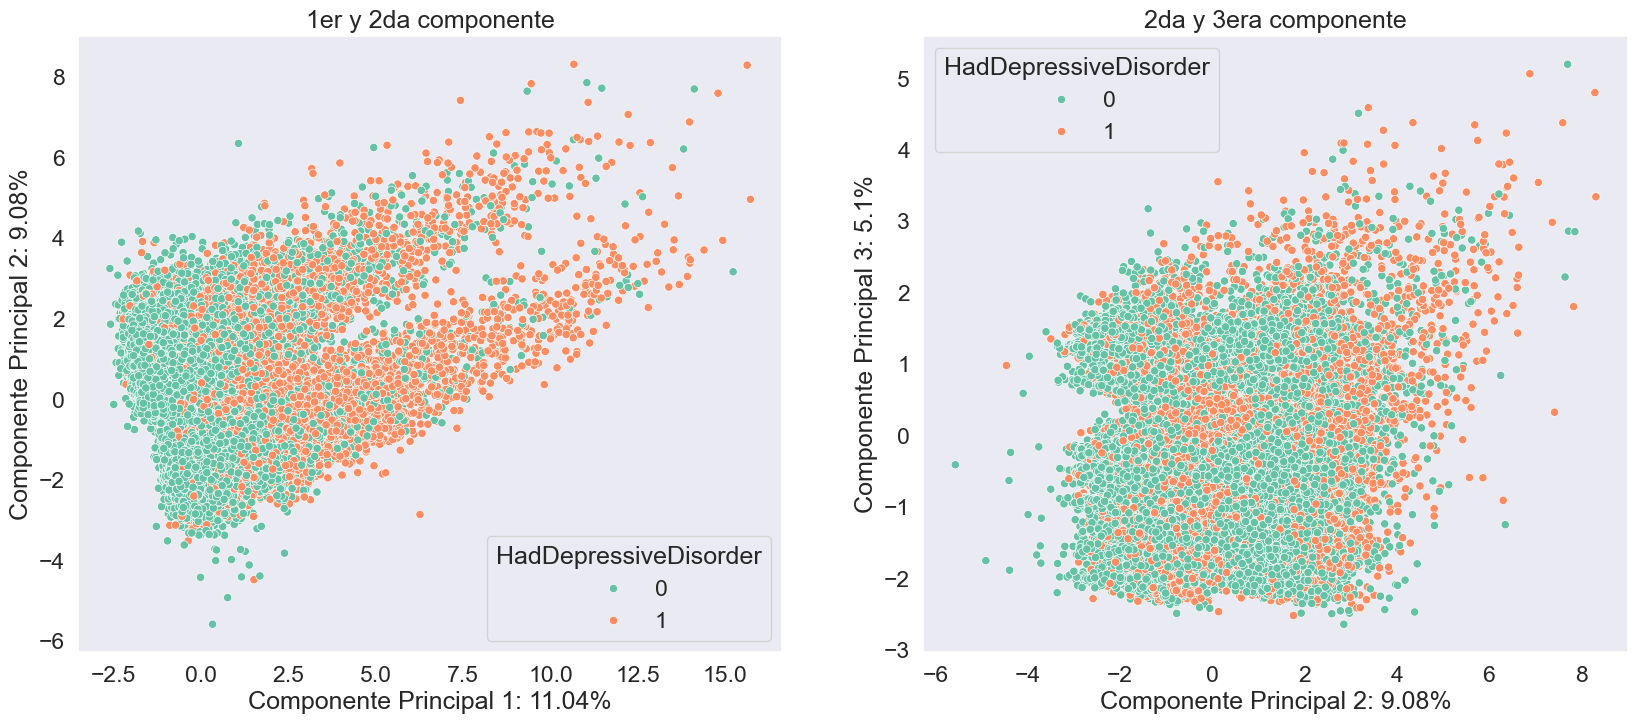

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=y, alpha=1, ax=ax1)
vars = pca.explained_variance_ratio_
var1 = round(100*vars[0],2)
var2 = round(100*vars[1],2)
ax1.set_xlabel("Componente Principal {}: {}%".format(1, var1))
ax1.set_ylabel("Componente Principal {}: {}%".format(2, var2))
ax1.set_title("1er y 2da componente")
plt.grid()

sns.scatterplot(x=x_pca[:,1], y=x_pca[:,2], hue=y, alpha=1, ax=ax2)
vars = pca.explained_variance_ratio_
var1 = round(100*vars[1],2)
var2 = round(100*vars[2],2)
ax2.set_xlabel("Componente Principal {}: {}%".format(2, var1))
ax2.set_ylabel("Componente Principal {}: {}%".format(3, var2))
ax2.set_title("2da y 3era componente")
plt.grid()
plt.show()

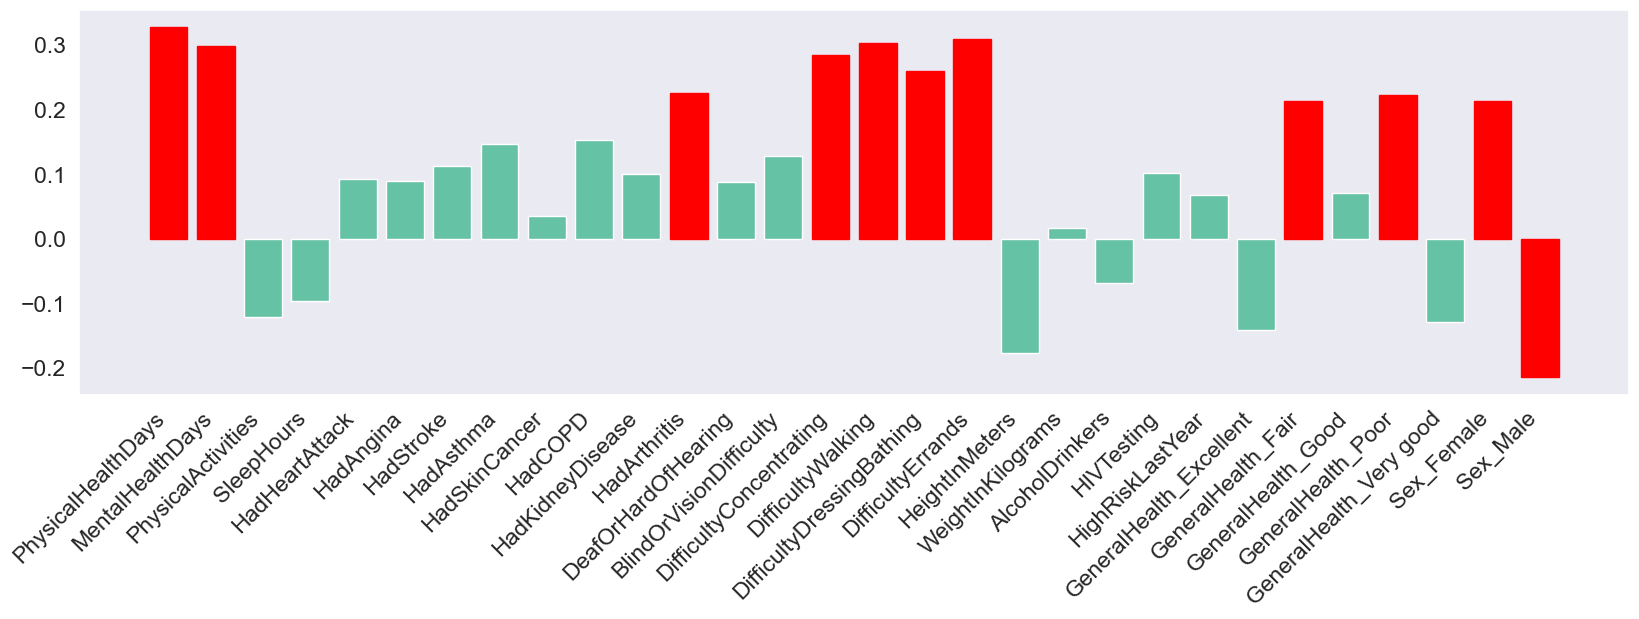

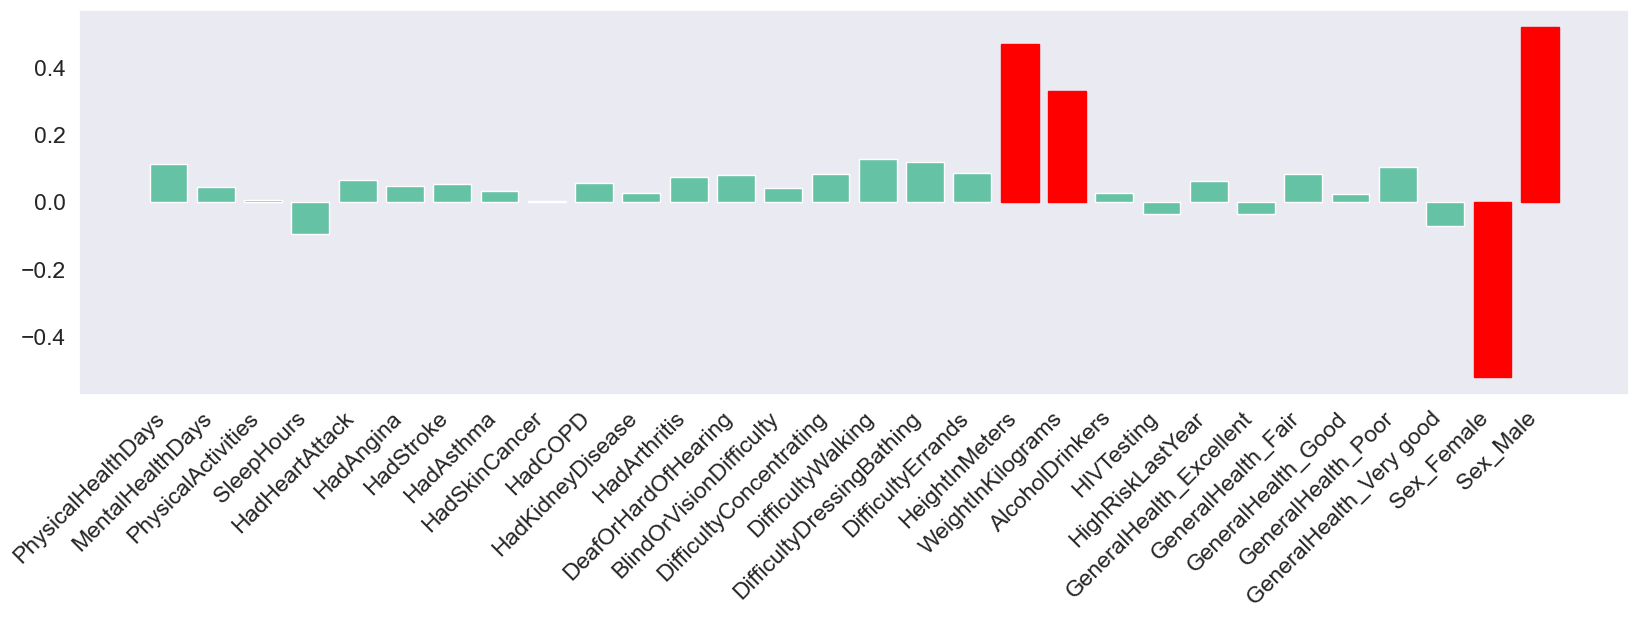

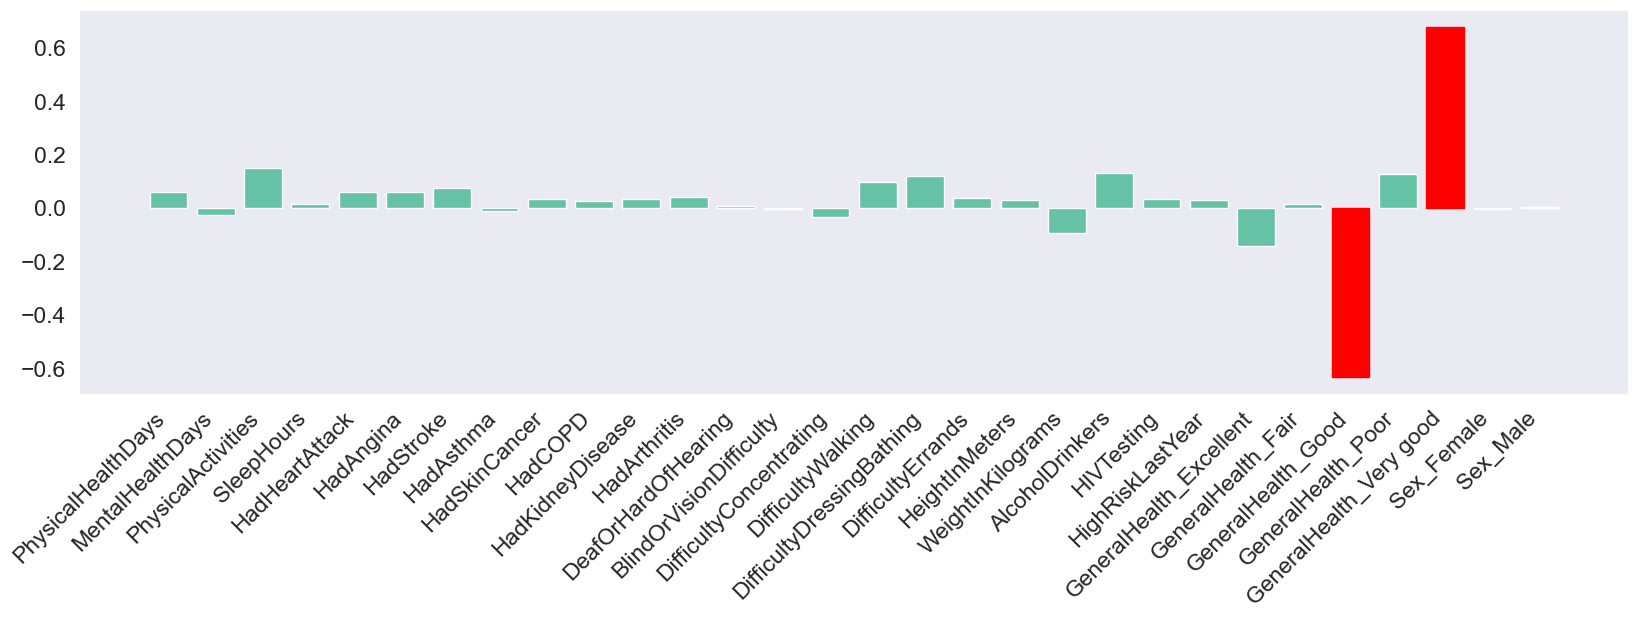

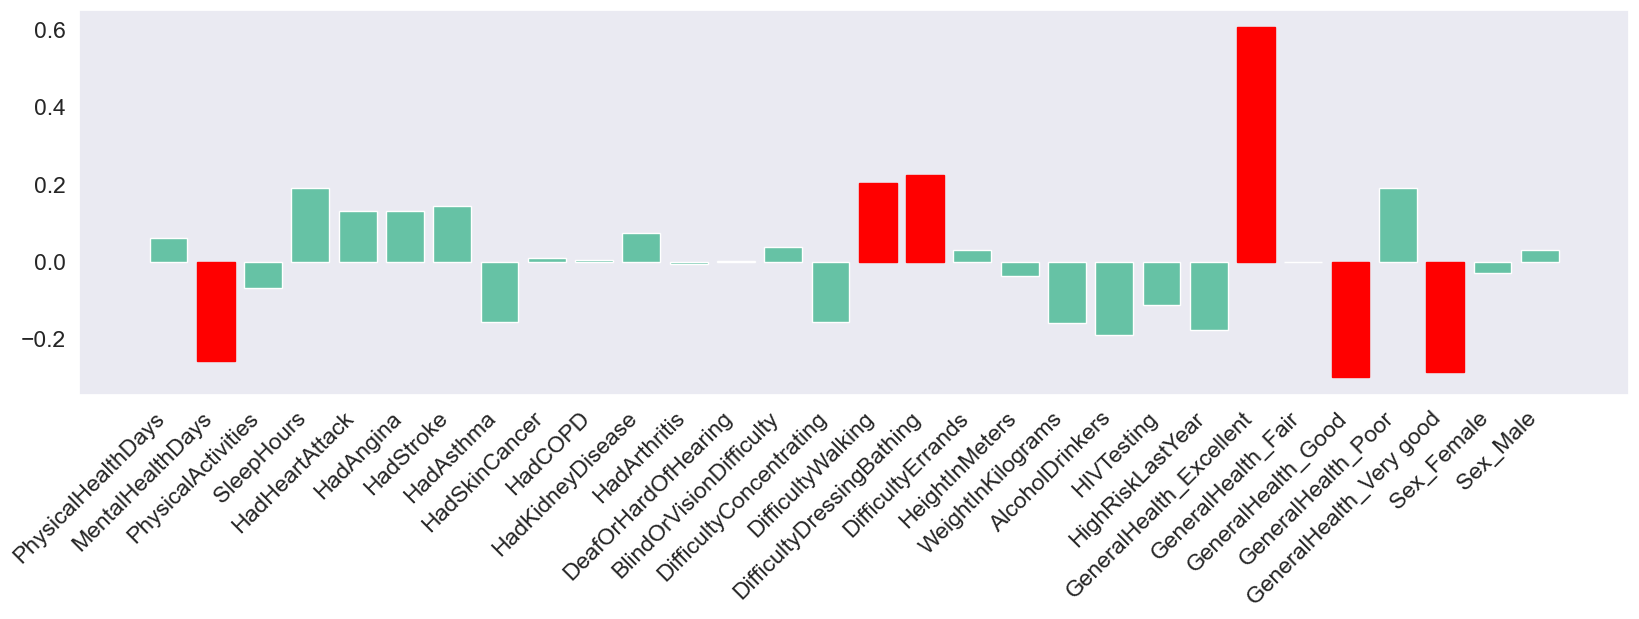

In [163]:
## Quitar algunas componentes
feature_names = nombres
for i, component in enumerate(pca.components_[:4]):
    plt.figure(figsize=(20,5))
    ax = plt.bar(nombres, component)
    # plt.xlabel('Variables')
    # plt.ylabel(f'Carga de la Componente Principal {i+1}')
    # plt.title(f'Cargas de la Componente Principal {i+1}')
    plt.xticks(nombres, rotation=45, ha='right')
    bars = ax.patches
    threshold = 0.2
    for bar in bars:
        if abs(bar.get_height()) > threshold:
            bar.set_color('red')
    plt.show()

#### Analisis por características

In [180]:
# sns.scatterplot(data=model_data, x="HeightInMeters", y="WeightInKilograms", hue="y", style="HadDepressiveDisorder", palette="Set2")

model_data[["HeightInMeters", "WeightInKilograms", "HadDepressiveDisorder"]].groupby("HadDepressiveDisorder").mean()

HeightInMeters  WeightInKilograms
HadDepressiveDisorder                                   
0                            1.724188          82.413790
1                            1.698748          84.598991

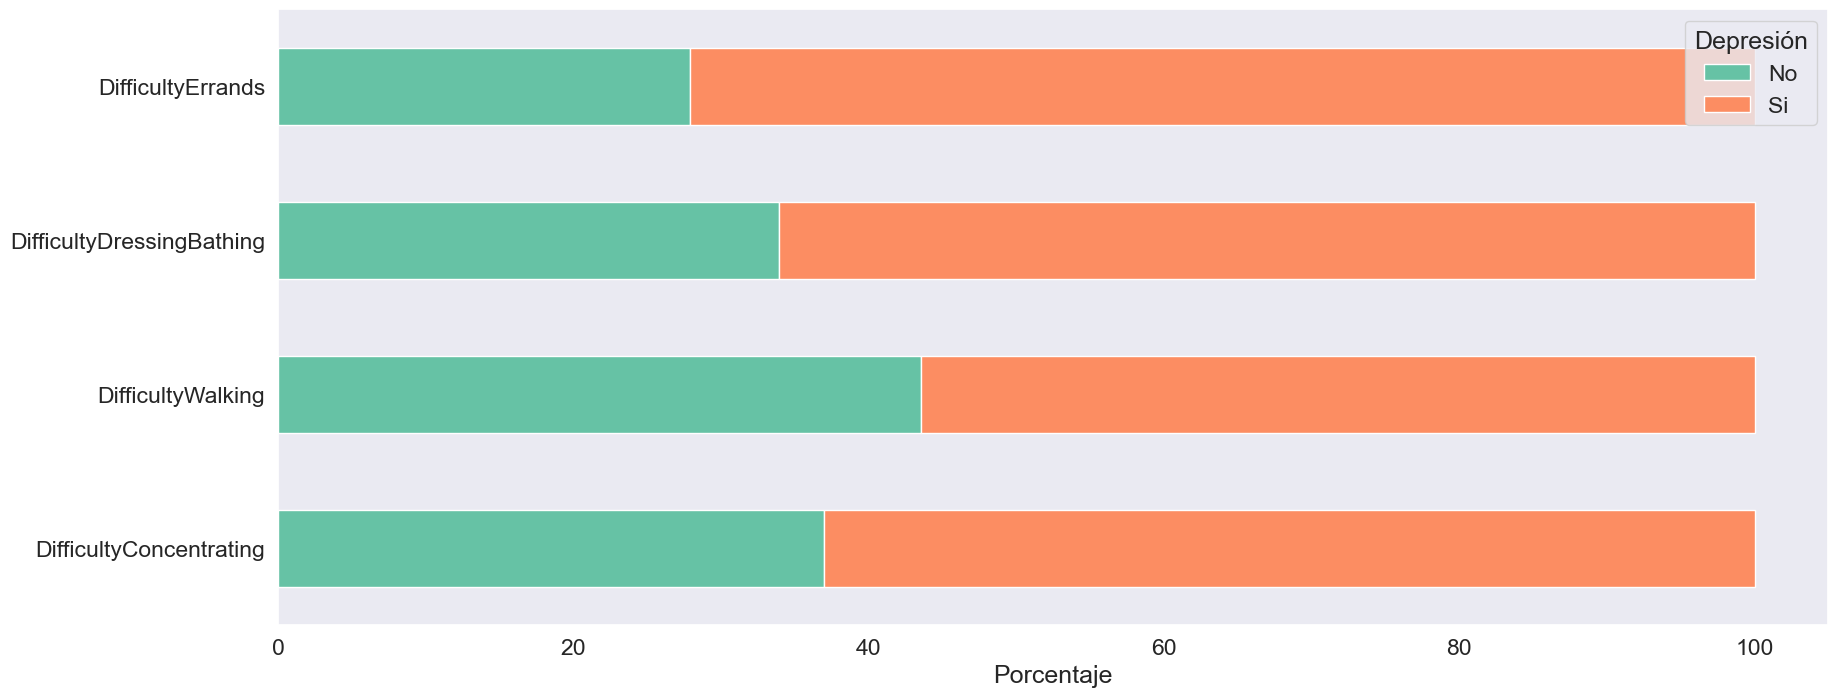

In [214]:
grouped = model_data[["DifficultyConcentrating", "DifficultyWalking", 'DifficultyDressingBathing', 'DifficultyErrands', "HadDepressiveDisorder"]].groupby("HadDepressiveDisorder").sum()
stacked = grouped.div(grouped.sum(axis=0), axis=1)*100
ax = stacked.T.plot(kind='barh', stacked=True, xlabel="Porcentaje")
ax.legend(labels=['No', 'Si'], loc='upper right',title="Depresión")
# ax.set_yticklabels(["Dificultad en Tareas Cotidianas", "Dificultad en Vestirse/Bañarse", "Dificultad para Caminar", "Dificultad para Concetrarse"])

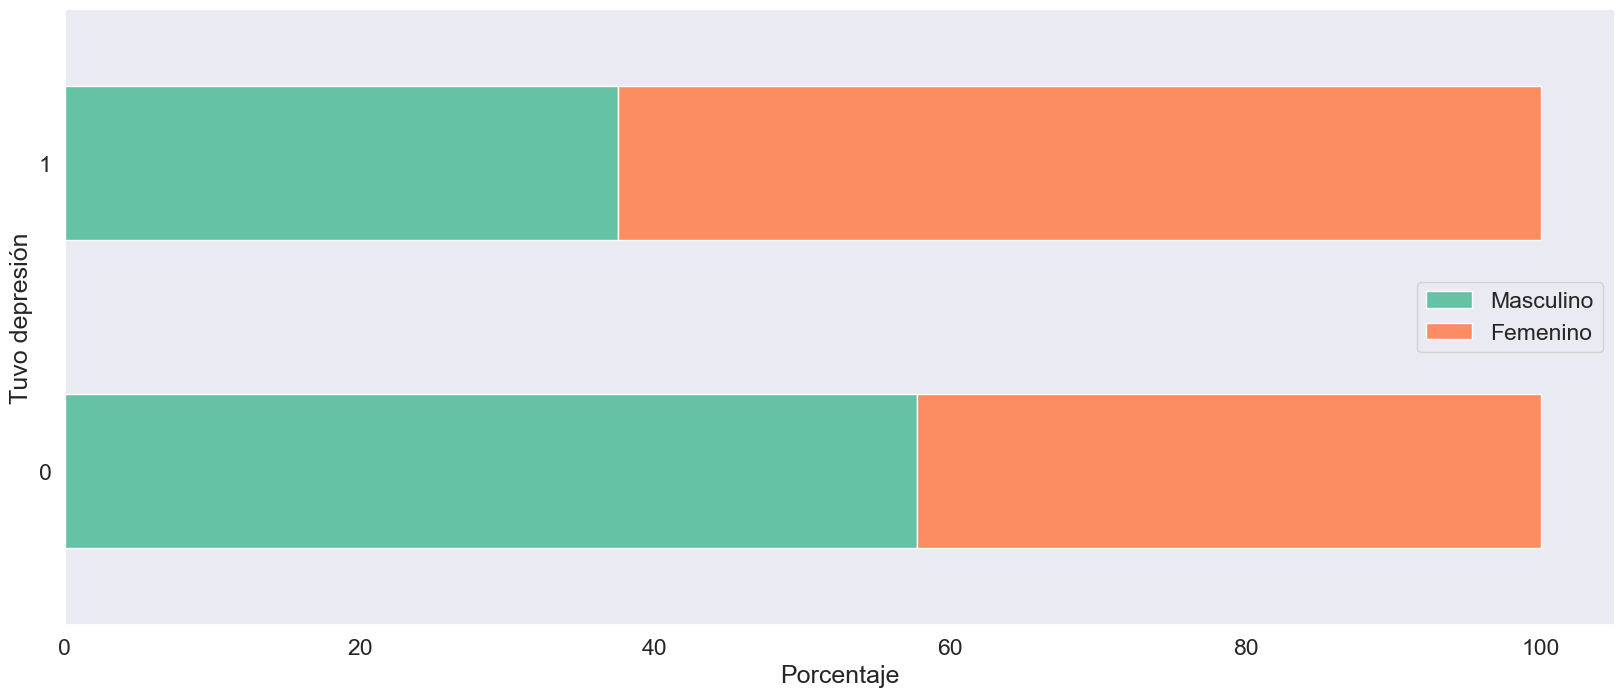

In [216]:
# fig, ax = plt.subplots(figsize=(24, 10))
grouped = model_data[["Sex_Male", "Sex_Female", "HadDepressiveDisorder"]].groupby("HadDepressiveDisorder").sum()
stacked = grouped.div(grouped.sum(axis=1), axis=0)*100
ax = stacked.plot(kind='barh', stacked=True, xlabel="Porcentaje", ylabel="Tuvo depresión")
ax.legend(labels=['Masculino', 'Femenino'], loc='center right')

<Axes: title={'center': 'Salud General'}, xlabel='Porcentaje', ylabel='Tuvo depresión'>

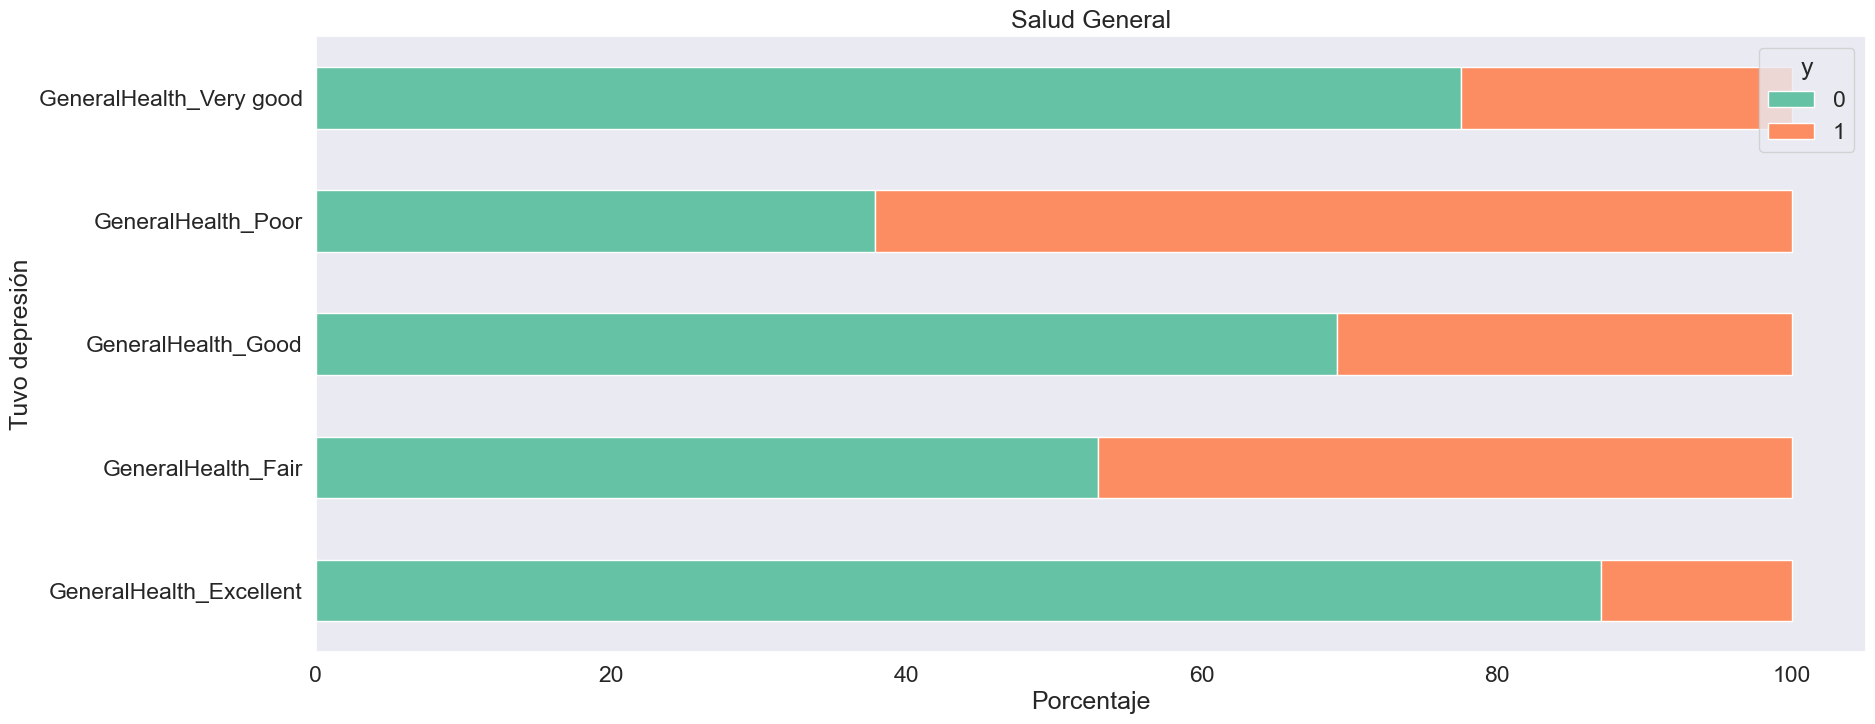

In [43]:
grouped = model_data[[ 'GeneralHealth_Excellent', 'GeneralHealth_Fair', 'GeneralHealth_Good', 'GeneralHealth_Poor', 'GeneralHealth_Very good', "y"]].groupby("y").sum()

stacked = grouped.div(grouped.sum(axis=0), axis=1)*100
stacked.T.plot(kind='barh', stacked=True, title='Salud General', xlabel="Porcentaje", ylabel="Tuvo depresión")

<Axes: ylabel='y'>

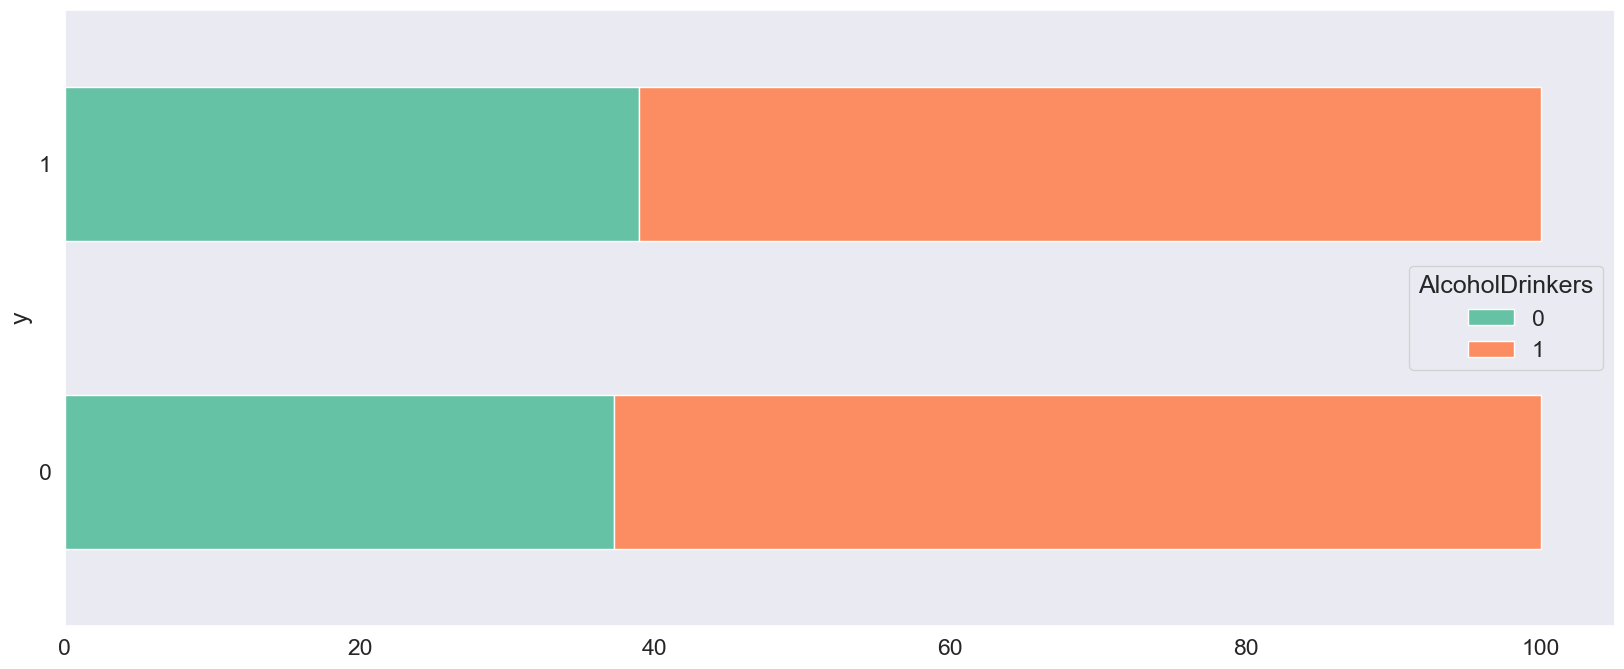

In [9]:
grouped = model_data[["AlcoholDrinkers", "y"]].groupby("y").value_counts().unstack()
stacked = grouped.div(grouped.sum(axis=1), axis=0)*100
stacked.plot(kind='barh', stacked=True)

<Axes: ylabel='y'>

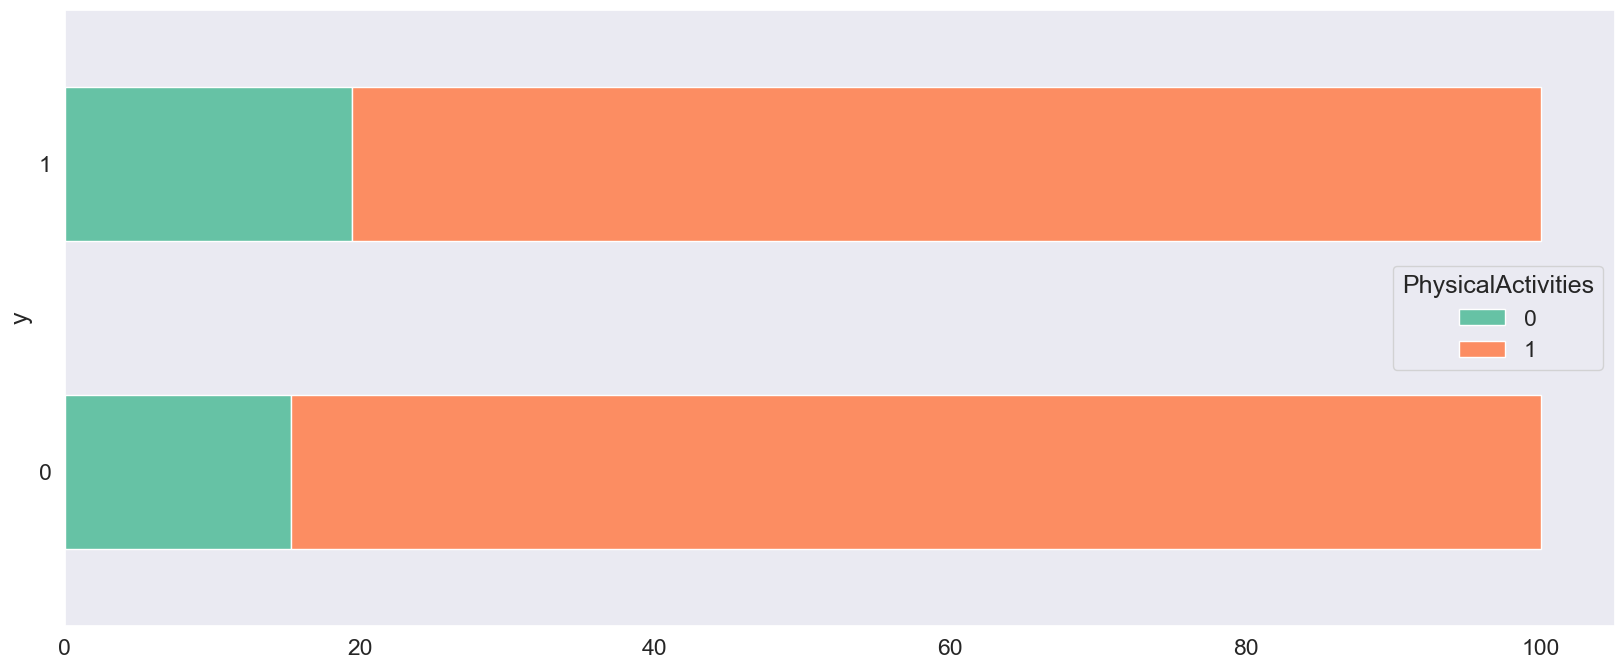

In [31]:
grouped = model_data[["PhysicalActivities", "y"]].groupby("y").value_counts().unstack()
stacked = grouped.div(grouped.sum(axis=1), axis=0)*100
stacked.plot(kind='barh', stacked=True)

# Clasificacion

In [34]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x = model_data.drop(["GeneralHealth", "Sex", "AgeCategory", "HadDepressiveDisorder"], axis=1)
y = model_data["HadDepressiveDisorder"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8521)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Modelo Árboles de Decisión

              precision    recall  f1-score   support

           0       0.81      0.80      0.80     11654
           1       0.47      0.48      0.48      4304

    accuracy                           0.71     15958
   macro avg       0.64      0.64      0.64     15958
weighted avg       0.72      0.71      0.72     15958



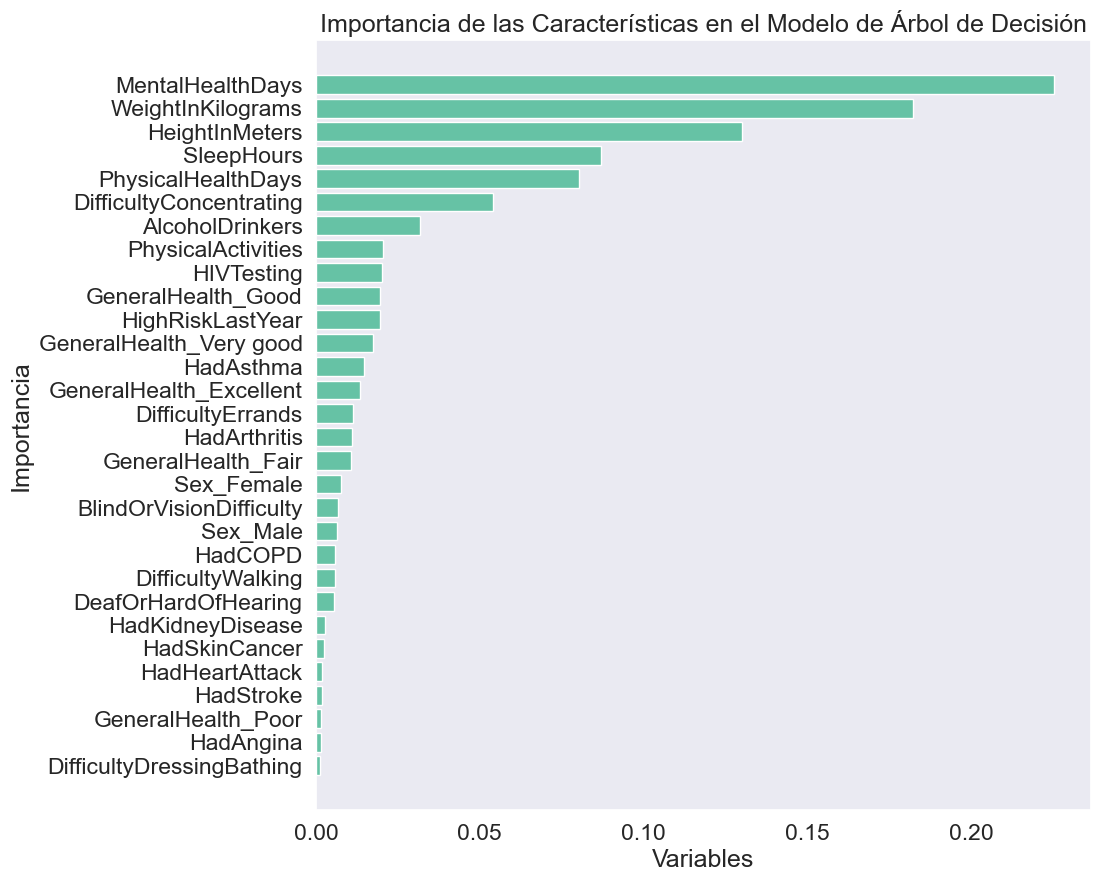

In [32]:
clf = DecisionTreeClassifier(random_state=8521)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

importancia = clf.feature_importances_
features = x.columns
importancia_df = pd.DataFrame({"Features": features, "Importancia": importancia}).sort_values("Importancia", ascending=True)

plt.figure(figsize=(10, 10))
plt.barh(importancia_df["Features"], importancia_df["Importancia"])
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en el Modelo de Árbol de Decisión')
plt.show()

Scoring Punto de corte .5:
Accuracy:  0.71
Recall:  0.48
Precision:  0.47


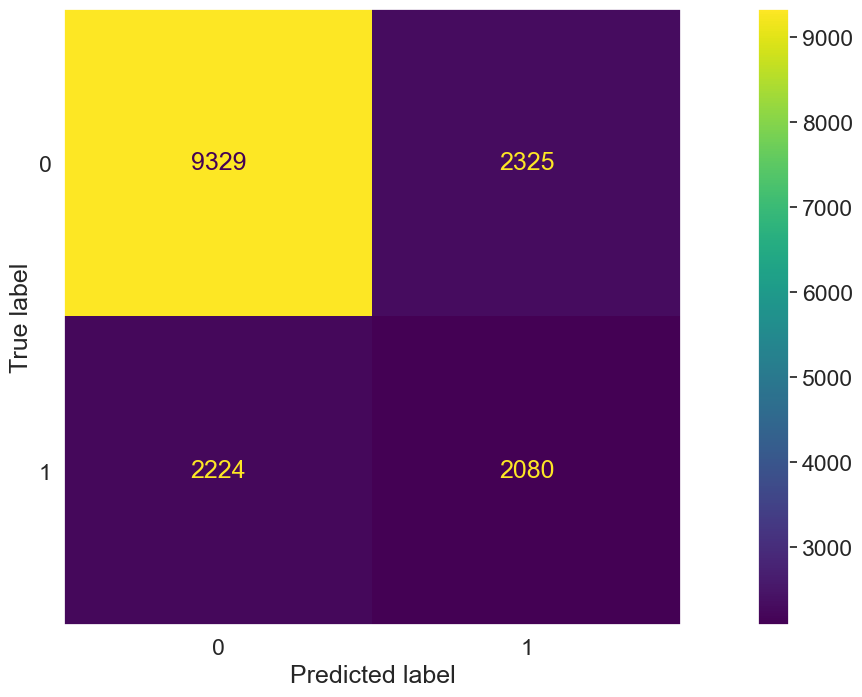

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score

conf = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['No', 'Si'])
disp.plot(values_format='d') 
plt.grid(False)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Scoring Punto de corte .5:")
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))

### Naive Bayes


Métricas sobre datos nuevos de TEST con punto de corte normal
Accuracy:  0.76
Recall:  0.41
Precision:  0.57


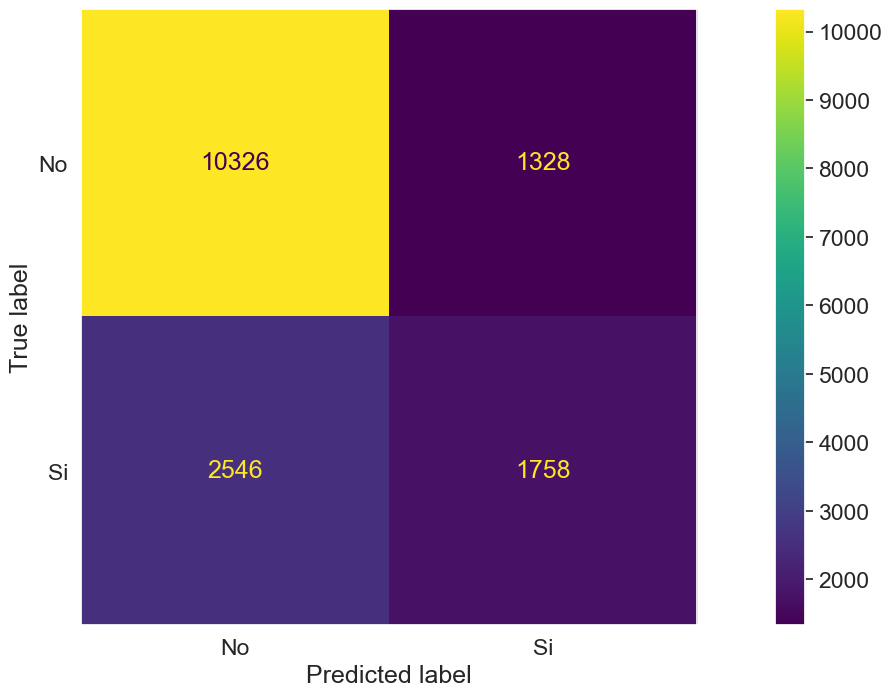

In [42]:
gnb = GaussianNB().fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)

conf = confusion_matrix(y_test, y_pred_gnb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=["No", "Si"])
disp.plot(values_format='d')

accuracy = accuracy_score(y_test, y_pred_gnb)
recall = recall_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb)

print('')
print('Métricas sobre datos nuevos de TEST con punto de corte normal')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))


### Bernoulli Naive Bayes


Métricas sobre datos nuevos de TEST con punto de corte arbitrario
Accuracy:  0.78
Recall:  0.54
Precision:  0.6


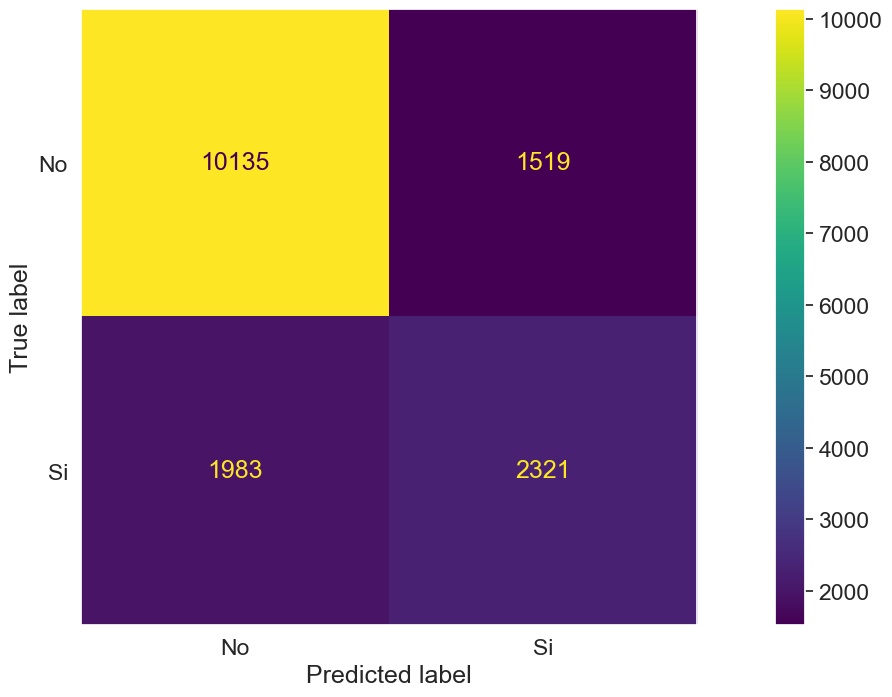

In [59]:
bnb = BernoulliNB().fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)

conf = confusion_matrix(y_test, y_pred_bnb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=["No", "Si"])
disp.plot(values_format='d')

accuracy = accuracy_score(y_test, y_pred_bnb)
recall = recall_score(y_test, y_pred_bnb)
precision = precision_score(y_test, y_pred_bnb)

print('')
print('Métricas sobre datos nuevos de TEST con punto de corte arbitrario')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))

### Discriminante Lineal


Métricas sobre datos nuevos de TEST con punto de corte normal
Accuracy:  0.8
Recall:  0.43
Precision:  0.7


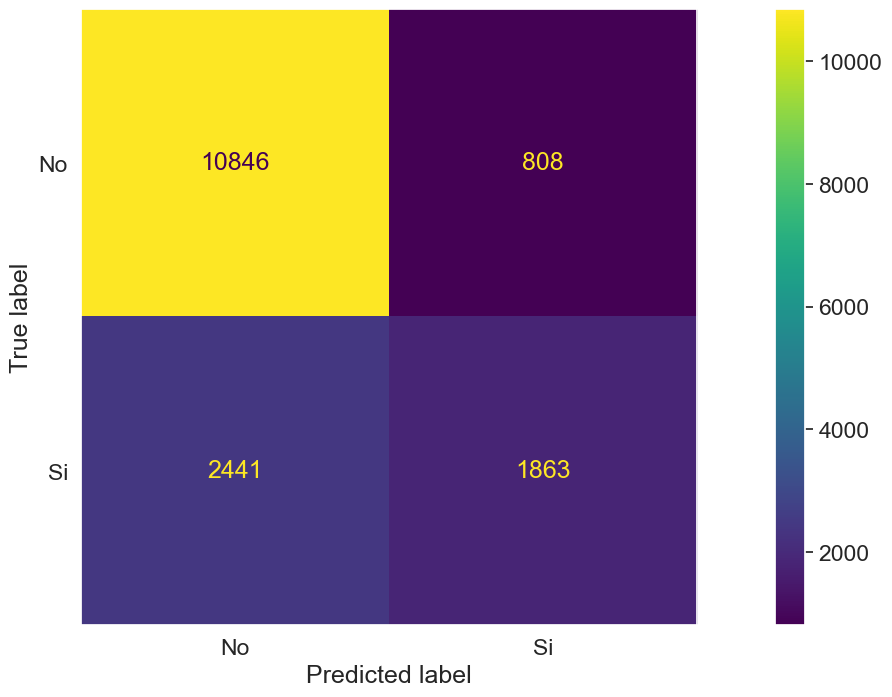

In [50]:
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
y_pred_lda = lda.predict(x_test)

conf = confusion_matrix(y_test, y_pred_lda)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=["No", "Si"])
disp.plot(values_format='d')

accuracy = accuracy_score(y_test, y_pred_lda)
recall = recall_score(y_test, y_pred_lda)
precision = precision_score(y_test, y_pred_lda)

print('')
print('Métricas sobre datos nuevos de TEST con punto de corte normal')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))

### Discriminante Logistico

c:\Users\Seidor\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Métricas sobre datos nuevos de TEST con punto de corte normal
Accuracy:  0.74
Recall:  0.43
Precision:  0.52


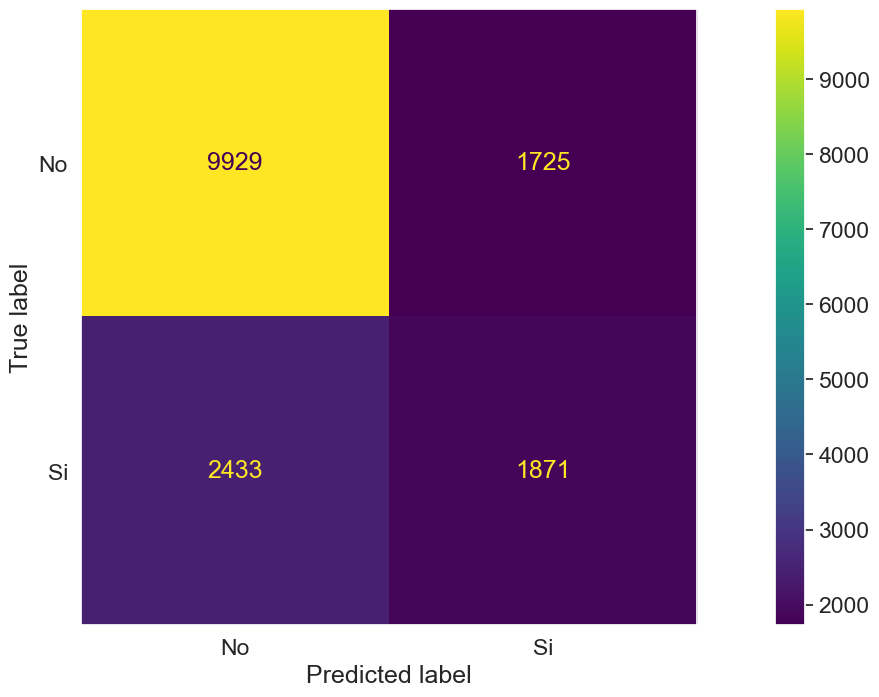

In [49]:
qda = QuadraticDiscriminantAnalysis().fit(x_train, y_train)
y_pred_qda = qda.predict(x_test)

conf = confusion_matrix(y_test, y_pred_qda)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=["No", "Si"])
disp.plot(values_format='d')

accuracy = accuracy_score(y_test, y_pred_qda)
recall = recall_score(y_test, y_pred_qda)
precision = precision_score(y_test, y_pred_qda)

print('')
print('Métricas sobre datos nuevos de TEST con punto de corte normal')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))

### Regresion Logistica


Métricas sobre datos nuevos de TEST con punto de corte normal
Accuracy:  0.8
Recall:  0.41
Precision:  0.71


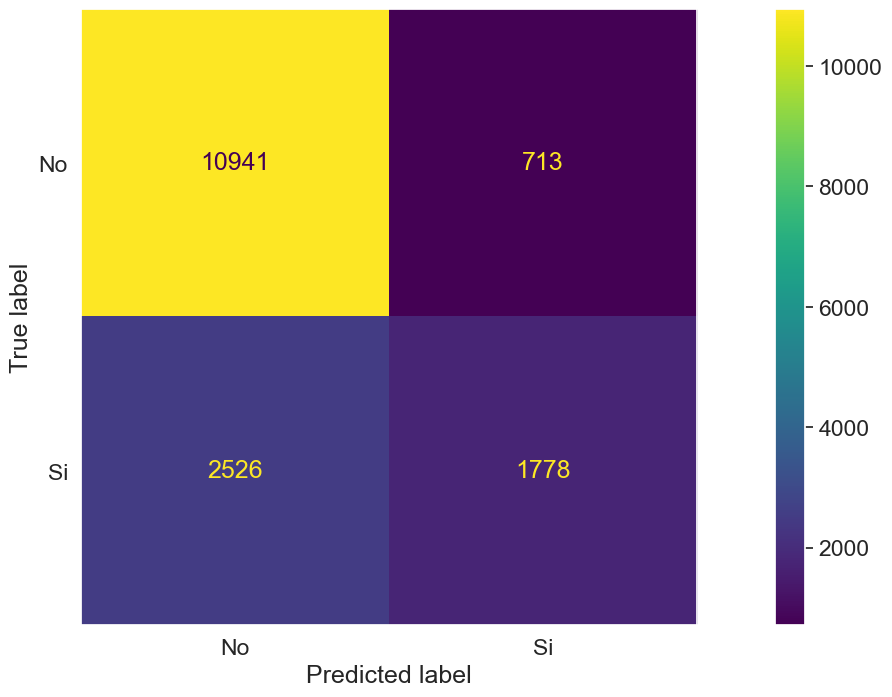

In [51]:
req = LogisticRegression().fit(x_train, y_train)
y_pred_reg = req.predict(x_test)

conf = confusion_matrix(y_test, y_pred_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=["No", "Si"])
disp.plot(values_format='d')

accuracy = accuracy_score(y_test, y_pred_reg)
recall = recall_score(y_test, y_pred_reg)
precision = precision_score(y_test, y_pred_reg)

print('')
print('Métricas sobre datos nuevos de TEST con punto de corte normal')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))

###  KMeans

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [12]:
# X = model_data.drop(["GeneralHealth", "Sex", "AgeCategory", "HadDepressiveDisorder", "y"], axis=1)
# estandarizo los valores de las X´s
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)


c:\Users\Seidor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Seidor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Seidor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Seidor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Seidor\anaconda3\lib\site-packages\sklearn\

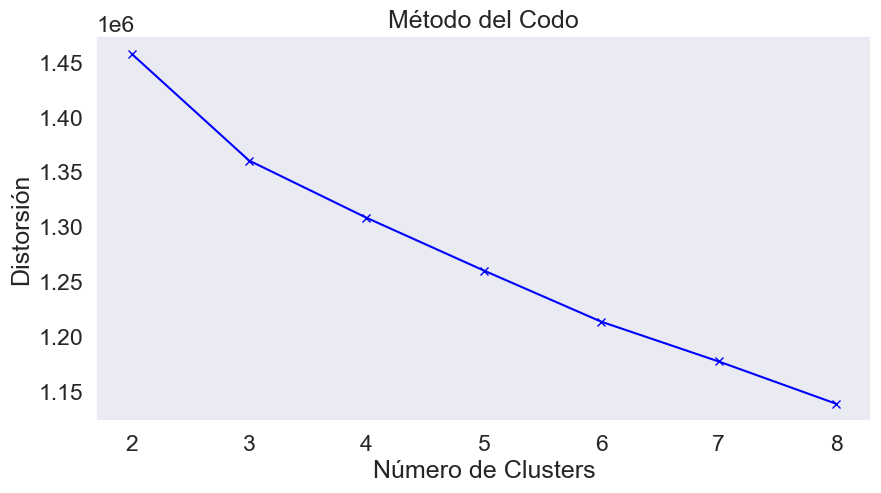

In [231]:
distortions = []
K = range(2, 9)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_pca)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, distortions, "bx-")
plt.xlabel('Número de Clusters')
plt.ylabel('Distorsión')
plt.title('Método del Codo')
plt.show()


c:\Users\Seidor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Seidor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Seidor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Seidor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


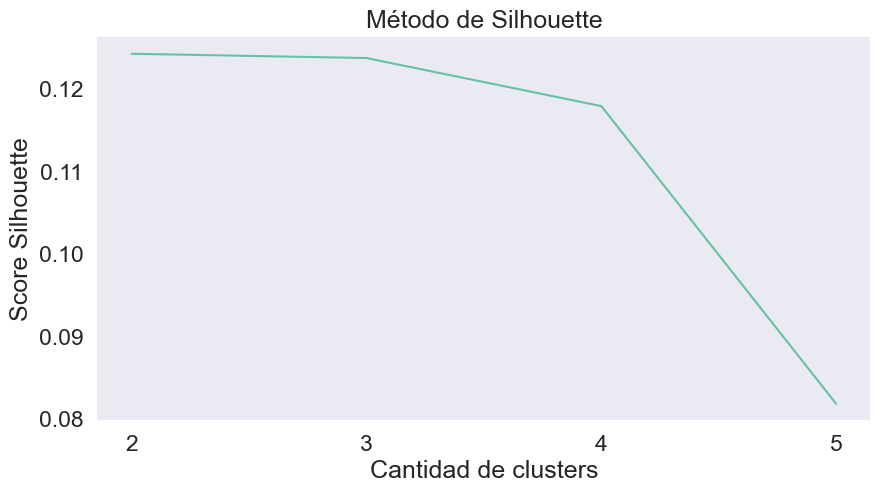

In [30]:
# from sklearn.cluster import KMeans

# Silhouette score: va entre -1 y 1 (1 es lo mejor).
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
# https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

silhouette_scores = []
rango_clusters = range(2,6)

for i in rango_clusters:
    # para cada valor de i, calculo kmeans y silhouette
    k_means = KMeans(n_clusters=i)
    k_means.fit(x_pca)
    
    sil_score = silhouette_score(x_pca, labels=k_means.labels_)
    silhouette_scores.append(sil_score)

plt.figure(figsize=(10, 5))
plt.plot(rango_clusters,silhouette_scores)
plt.xticks(rango_clusters)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Score Silhouette')
plt.title('Método de Silhouette')
plt.show()

In [400]:
cant_clusters = 2
kmeans = KMeans(n_clusters=cant_clusters, random_state=8521).fit(x_pca)
y_kmeans = pd.Series(kmeans.predict(x_pca))
centroides = kmeans.cluster_centers_

c:\Users\Seidor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


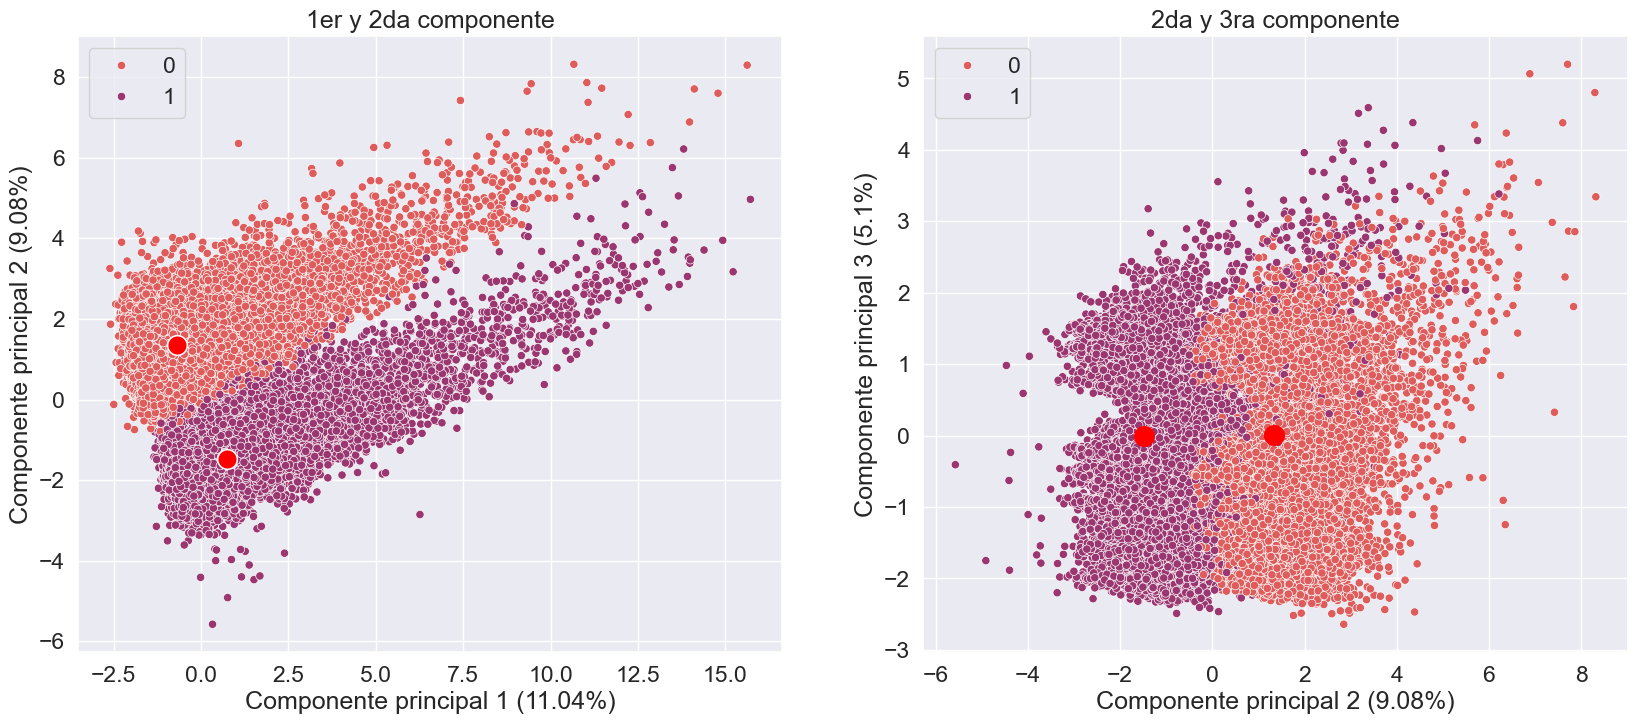

In [401]:
fig, (ax1, ax2) = plt.subplots(1, 2)

vars = pca.explained_variance_ratio_


var1 = round(100*vars[0],2)
var2 = round(100*vars[1],2)
# plt.scatter(x_pca[:,0],x_pca[:,1], c=kmeans.labels_, cmap="Paired")
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1], hue=kmeans.labels_, palette="flare", ax=ax1)
sns.scatterplot(x=centroides[:,0],y=centroides[:, 1], c="red", s=200, ax=ax1)
# ax1.scatter(centroides[:,0],centroides[:, 1], c="red", s=200)
ax1.set_xlabel("Componente principal 1 ({}%)".format(var1))
ax1.set_ylabel("Componente principal 2 ({}%)".format(var2))
ax1.set_title("1er y 2da componente")

var1 = round(100*vars[1],2)
var2 = round(100*vars[2],2)
# grafico en el plano PCA datos, clusters y centroides
# plt.scatter(x_pca[:,1],x_pca[:,2], c=kmeans.labels_, cmap="Paired")
sns.scatterplot(x=x_pca[:,1],y=x_pca[:,2], hue=kmeans.labels_, palette="flare", ax=ax2)
ax2.scatter(centroides[:,1],centroides[:, 2], c="red", s=200)
ax2.set_xlabel("Componente principal 2 ({}%)".format(var1))
ax2.set_ylabel("Componente principal 3 ({}%)".format(var2))
ax2.set_title("2da y 3ra componente")

plt.show()

PhysicalHealthDays  MentalHealthDays  PhysicalActivities  SleepHours  \
Cluster                                                                         
0                 -0.683074          1.347388            0.005098    0.039741   
1                  0.751101         -1.481574           -0.005606   -0.043699   

         HadHeartAttack  HadAngina  HadStroke  HadAsthma  HadSkinCancer  \
Cluster                                                                   
0             -0.040207   0.010780  -0.010294   0.079585       0.024510   
1              0.044211  -0.011853   0.011319  -0.087511      -0.026951   

          HadCOPD  HadKidneyDisease  HadArthritis  DeafOrHardOfHearing  \
Cluster                                                                  
0       -0.004727          -0.00934      0.061946             0.028918   
1        0.005198           0.01027     -0.068116            -0.031798   

         BlindOrVisionDifficulty  DifficultyConcentrating  DifficultyWalking  \
Cluster                                                                        
0                      -0.036300                -0.003894          -0.050653   
1                       0.039915                 0.004282           0.055697   

         DifficultyDressingBathing  DifficultyErrands  HeightInMeters  \
Cluster                                                                 
0                        -0.029226          -0.016530        0.012059   
1                         0.032137           0.018177       -0.013260   

         WeightInKilograms  AlcoholDrinkers  HIVTesting  HighRiskLastYear  \
Cluster                                                                     
0                 0.039563        -0.012603   -0.012743         -0.196975   
1                -0.043503         0.013859    0.014012          0.216591   

         GeneralHealth_Excellent  GeneralHealth_Fair  GeneralHealth_Good  \
Cluster                                                                    
0                      -0.005248           -0.001194            0.013761   
1                       0.005771            0.001313           -0.015132   

         GeneralHealth_Poor  GeneralHealth_Very good    Sex_Female  \
Cluster                                                              
0                  0.040190                 0.087876 -5.976888e-16   
1                 -0.044193                -0.096628  5.489953e-16   

             Sex_Male  
Cluster                
0        4.998973e-16  
1       -5.834521e-16

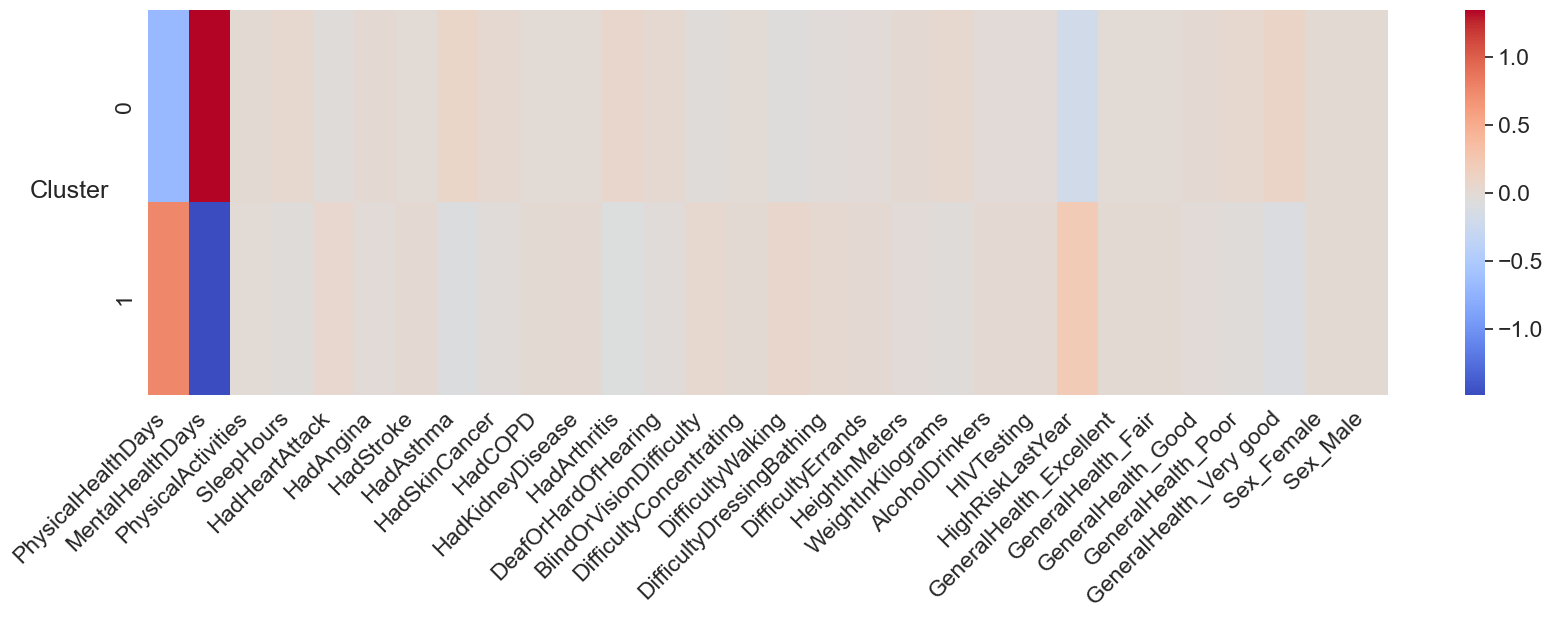

In [398]:
fig, ax = plt.subplots(figsize=(20, 5))
k2 = pd.DataFrame(x_pca.copy(), columns=nombres)
k2["Cluster"] = y_kmeans
k2_clusters_mean = k2.groupby(["Cluster"]).mean()
sns.heatmap(k2_clusters_mean, annot=False, cmap='coolwarm', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right')
k2.groupby(["Cluster"]).mean()


In [404]:
cant_clusters = 3
kmeans = KMeans(n_clusters=cant_clusters, random_state=0).fit(x_pca)
y_kmeans = pd.Series(kmeans.predict(x_pca))
centroides = kmeans.cluster_centers_

c:\Users\Seidor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


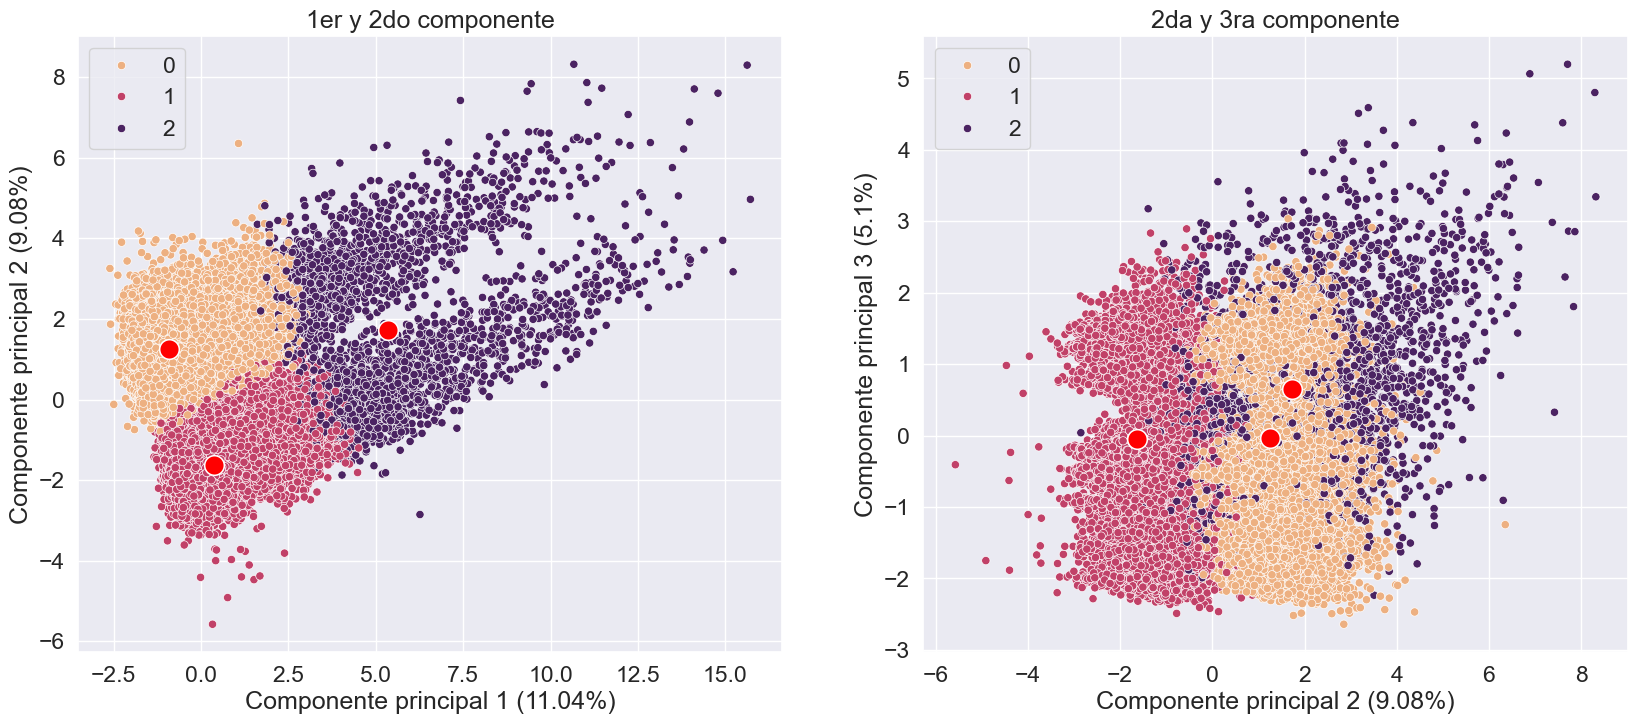

In [407]:
fig, (ax1, ax2) = plt.subplots(1, 2)

vars = pca.explained_variance_ratio_
var1 = round(100*vars[0],2)
var2 = round(100*vars[1],2)
# grafico en el plano PCA datos, clusters y centroides
# plt.scatter(x_pca[:,0],x_pca[:,1], c=kmeans.labels_, cmap="Paired")
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1], hue=kmeans.labels_, palette="flare", ax=ax1)
sns.scatterplot(x=centroides[:,0],y=centroides[:, 1], c="red", s=200, ax=ax1)
# plt.scatter(centroides[:,0],centroides[:, 1], c="red", s=200)
ax1.set_xlabel("Componente principal 1 ({}%)".format(var1))
ax1.set_ylabel("Componente principal 2 ({}%)".format(var2))
ax1.set_title("1er y 2do componente")

var1 = round(100*vars[1],2)
var2 = round(100*vars[2],2)
# grafico en el plano PCA datos, clusters y centroides
# plt.scatter(x_pca[:,1],x_pca[:,2], c=kmeans.labels_, cmap="Paired")
sns.scatterplot(x=x_pca[:,1],y=x_pca[:,2], hue=kmeans.labels_, palette="flare", ax=ax2)
sns.scatterplot(x=centroides[:,1],y=centroides[:, 2], c="red", s=200, ax=ax2)
# plt.scatter(centroides[:,1],centroides[:, 2], c="red", s=200)
ax2.set_xlabel("Componente principal 2 ({}%)".format(var1))
ax2.set_ylabel("Componente principal 3 ({}%)".format(var2))
ax2.set_title("2da y 3ra componente")

plt.show()

PhysicalHealthDays  MentalHealthDays  PhysicalActivities  SleepHours  \
Cluster                                                                         
0                 -0.922585          1.252458           -0.028561   -0.009868   
1                  0.363916         -1.635422           -0.050552   -0.112473   
2                  5.346134          1.717557            0.651604    0.972210   

         HadHeartAttack  HadAngina  HadStroke  HadAsthma  HadSkinCancer  \
Cluster                                                                   
0             -0.043359   0.020177  -0.036635   0.069442       0.023044   
1              0.062824   0.015315  -0.009453  -0.077408      -0.019383   
2             -0.108272  -0.299932   0.400257  -0.009095      -0.052591   

          HadCOPD  HadKidneyDisease  HadArthritis  DeafOrHardOfHearing  \
Cluster                                                                  
0       -0.000965         -0.007736      0.072083             0.032999   
1       -0.005134          0.020704     -0.067650            -0.038713   
2        0.048953         -0.093977     -0.109327             0.010844   

         BlindOrVisionDifficulty  DifficultyConcentrating  DifficultyWalking  \
Cluster                                                                        
0                      -0.035195                -0.009318          -0.053365   
1                       0.030556                 0.017469           0.066472   
2                       0.072839                -0.054472          -0.047940   

         DifficultyDressingBathing  DifficultyErrands  HeightInMeters  \
Cluster                                                                 
0                        -0.039861          -0.012578        0.006388   
1                         0.028225           0.019231       -0.017505   
2                         0.132676          -0.039327        0.080817   

         WeightInKilograms  AlcoholDrinkers  HIVTesting  HighRiskLastYear  \
Cluster                                                                     
0                 0.028850        -0.022298   -0.006218         -0.195471   
1                -0.044307         0.022200    0.010718          0.224707   
2                 0.091747         0.023804   -0.028959         -0.027963   

         GeneralHealth_Excellent  GeneralHealth_Fair  GeneralHealth_Good  \
Cluster                                                                    
0                      -0.005015            0.003420            0.025074   
1                       0.023070            0.015512            0.010920   
2                      -0.136793           -0.152401           -0.308944   

         GeneralHealth_Poor  GeneralHealth_Very good    Sex_Female  \
Cluster                                                              
0                  0.032672                 0.089588 -7.332998e-16   
1                 -0.054927                -0.096981  3.127850e-16   
2                  0.141254                -0.034421  3.148849e-15   

             Sex_Male  
Cluster                
0        4.875023e-16  
1       -6.061089e-16  
2        1.433837e-16

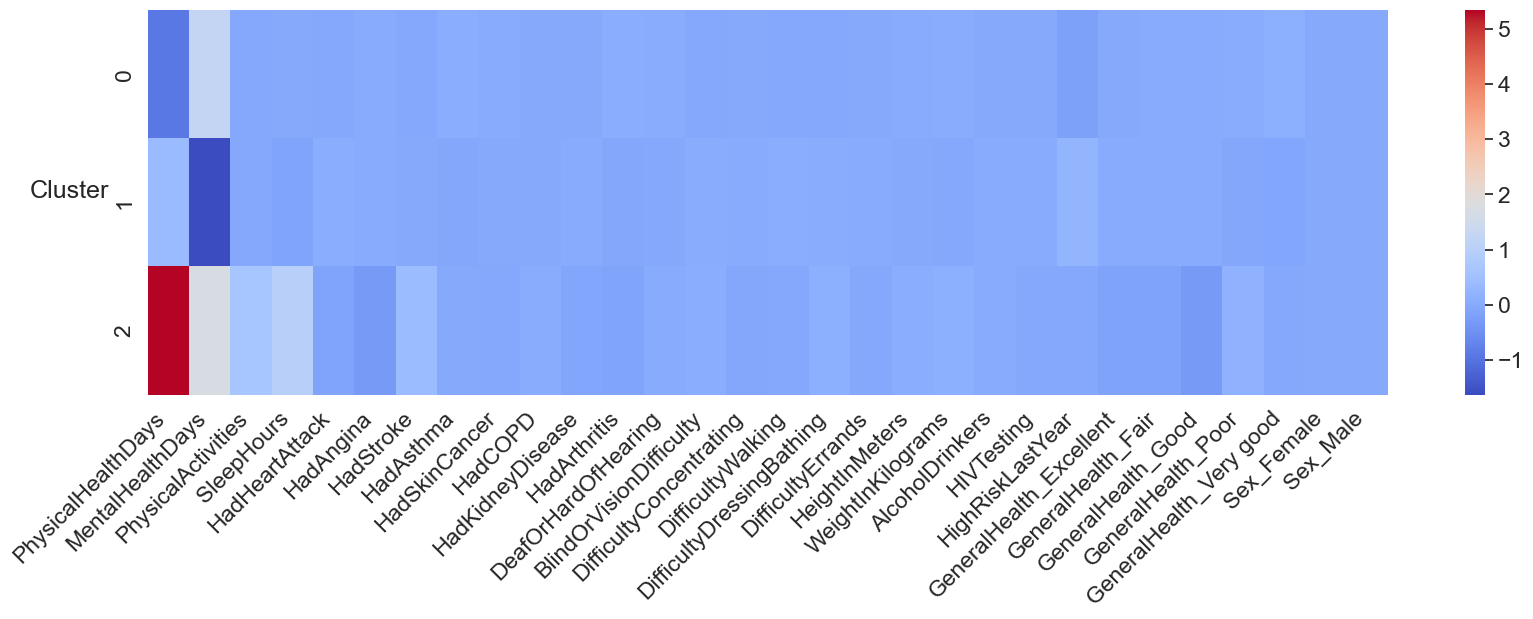

In [409]:
fig, ax = plt.subplots(figsize=(20, 5))
k3 = pd.DataFrame(x_pca.copy(), columns=nombres)
k3["Cluster"] = y_kmeans
k3_clusters_mean = k3.groupby(["Cluster"]).mean()
sns.heatmap(k3_clusters_mean, annot=False, cmap='coolwarm', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right')
k3.groupby(["Cluster"]).mean()

### DBSCAN

In [412]:
km = KMeans(n_clusters=10000, random_state=8521).fit(x_pca)
centroides_ = km.cluster_centers_

c:\Users\Seidor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


PhysicalHealthDays  MentalHealthDays  PhysicalActivities  SleepHours  \
Cluster                                                                         
-1.0               0.002466          0.006573            0.004807    0.017351   
 0.0               0.055439         -0.069509            0.029446    0.005363   
 1.0              -0.035339         -0.058040            0.090132    0.032042   

         HadHeartAttack  HadAngina  HadStroke  HadAsthma  HadSkinCancer  \
Cluster                                                                   
-1.0          -0.051362   0.080359   0.045078  -0.020080      -0.024954   
 0.0          -0.009224   0.066752   0.044248   0.004395      -0.008970   
 1.0          -0.100410   0.181139   0.063111  -0.021550      -0.004121   

          HadCOPD  HadKidneyDisease  HadArthritis  DeafOrHardOfHearing  \
Cluster                                                                  
-1.0    -0.016829         -0.024615      0.007708             0.013807   
 0.0    -0.040894         -0.020719      0.008897             0.020953   
 1.0    -0.100000         -0.024978      0.005456             0.093158   

         BlindOrVisionDifficulty  DifficultyConcentrating  DifficultyWalking  \
Cluster                                                                        
-1.0                   -0.010642                 0.011283          -0.003031   
 0.0                    0.000920                -0.008455           0.010255   
 1.0                   -0.016163                -0.088567          -0.048828   

         DifficultyDressingBathing  DifficultyErrands  HeightInMeters  \
Cluster                                                                 
-1.0                     -0.000779           0.023761        0.006741   
 0.0                     -0.029029          -0.036955        0.003484   
 1.0                     -0.057188           0.052175        0.041504   

         WeightInKilograms  AlcoholDrinkers  HIVTesting  HighRiskLastYear  \
Cluster                                                                     
-1.0              0.006218         0.041076   -0.007199         -0.053013   
 0.0              0.029535         0.046152   -0.024841         -0.040171   
 1.0              0.079945         0.034648   -0.028993         -0.100970   

         GeneralHealth_Excellent  GeneralHealth_Fair  GeneralHealth_Good  \
Cluster                                                                    
-1.0                   -0.002788           -0.005127           -0.007145   
 0.0                    0.014762            0.003484           -0.002827   
 1.0                   -0.042585            0.021759            0.041108   

         GeneralHealth_Poor  GeneralHealth_Very good    Sex_Female  \
Cluster                                                              
-1.0               0.021064                 0.000523 -1.668831e-16   
 0.0               0.001056                -0.007474 -2.610375e-16   
 1.0              -0.010141                 0.034367 -4.853153e-16   

             Sex_Male  
Cluster                
-1.0     8.417637e-18  
 0.0    -2.980245e-17  
 1.0     4.073145e-17

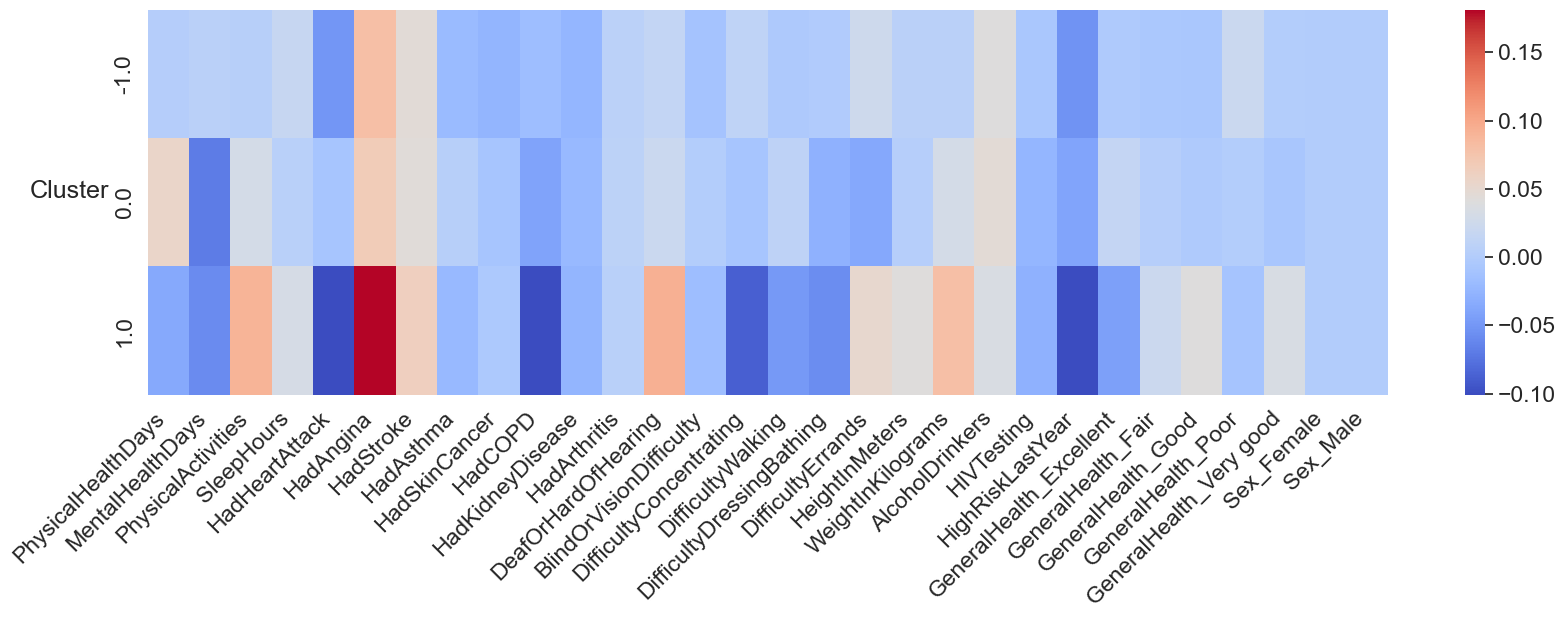

In [422]:
from sklearn.cluster import DBSCAN

epsilon = 4
cant_min_puntos = 60
dbscan = DBSCAN(eps=epsilon, min_samples=cant_min_puntos)

clusters = dbscan.fit_predict(centroides_)
y_dbs = pd.Series(clusters)
# dbscan_data["Cluster"] = clusters

fig, ax = plt.subplots(figsize=(20, 5))
dbscan_data = pd.DataFrame(x_pca.copy(), columns=nombres)
dbscan_data["Cluster"] = y_dbs
# dbscan_data.drop(["Sex", "GeneralHealth", "AgeCategory"], axis=1, inplace=True)
dbscan_clusters_mean = dbscan_data.groupby(["Cluster"]).mean()
sns.heatmap(dbscan_clusters_mean, annot=False, cmap='coolwarm', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right')
dbscan_clusters_mean


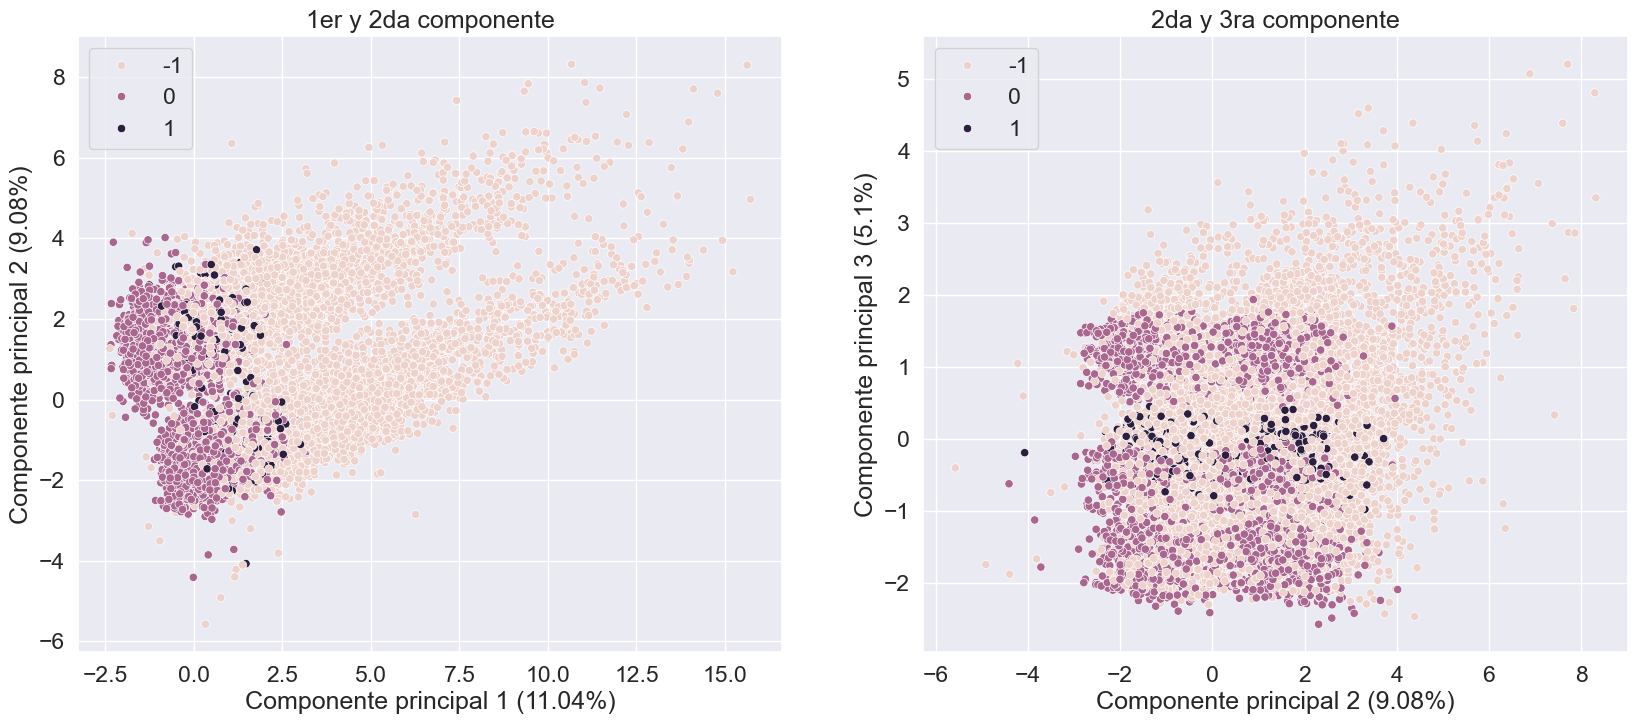

In [426]:
fig, (ax1, ax2) = plt.subplots(1, 2)


var1 = round(100*vars[0],2)
var2 = round(100*vars[1],2)
sns.scatterplot(
    x=centroides_[:,0],
    y=centroides_[:,1],
    hue=clusters,
    ax=ax1
)
ax1.set_title('1er y 2da componente')
ax1.set_xlabel("Componente principal 1 ({}%)".format(var1))
ax1.set_ylabel("Componente principal 2 ({}%)".format(var2))


var1 = round(100*vars[1],2)
var2 = round(100*vars[2],2)
sns.scatterplot(
    x=centroides_[:,1],
    y=centroides_[:,2],
    hue=clusters,
    ax=ax2
)
ax2.set_title('2da y 3ra componente')
ax2.set_xlabel("Componente principal 2 ({}%)".format(var1))
ax2.set_ylabel("Componente principal 3 ({}%)".format(var2))
plt.show()

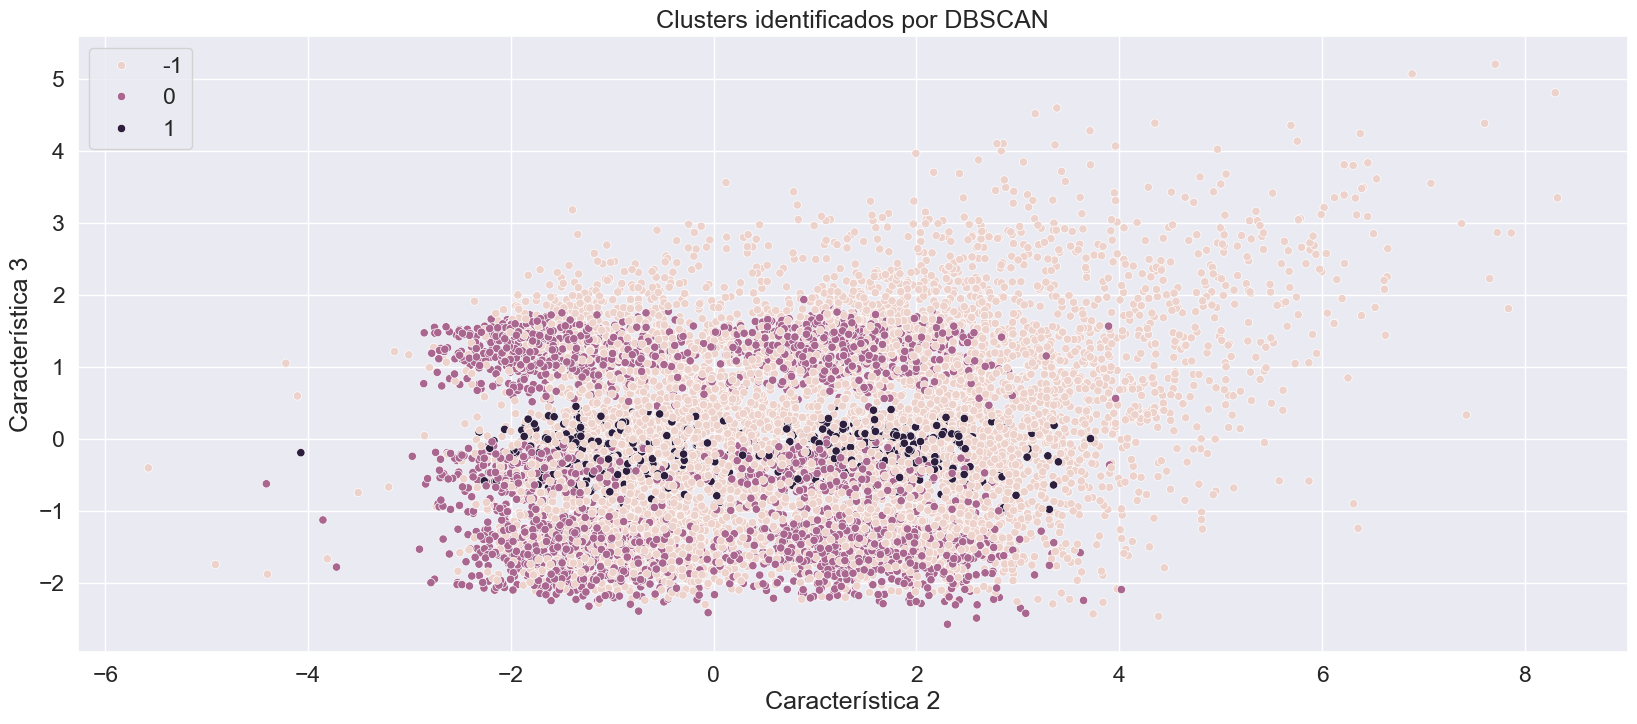

In [415]:
sns.scatterplot(
    x=centroides_[:,1],
    y=centroides_[:,2],
    hue=clusters
)
plt.title('Clusters identificados por DBSCAN')
plt.xlabel('Característica 2')
plt.ylabel('Característica 3')
plt.show()

### Agglomerative Clustering

In [416]:
# from sklearn.cluster import AgglomerativeClustering
# linkage = ['ward', 'complete', 'average', 'single']
# labels = []
# # kmeans = KMeans(n_clusters=2000, random_state=0).fit(X)
# # y_kmeans = pd.Series(kmeans.predict(X))
# # que me diga los centroides
# # centroides = kmeans.cluster_centers_
# # centroides_pca = pca.transform(centroides)
# for link in linkage:
#     agglomerative = AgglomerativeClustering(n_clusters=2, linkage=link)
#     agglomerative_clusters = agglomerative.fit(centroides)
#     labels.append(agglomerative_clusters.labels_)



In [417]:
# sns.scatterplot(
#     x=centroides[:,0],
#     y=centroides[:,1],
#     hue=labels[0])
# plt.title('Clusters identificados por Agglomerative Clustering')

In [418]:
# sns.scatterplot(
#     x=centroides[:,0],
#     y=centroides[:,1],
#     hue=labels[1])
# plt.title('Clusters identificados por Agglomerative Clustering')

In [419]:
# sns.scatterplot(
#     x=centroides[:,0],
#     y=centroides[:,1],
#     hue=labels[2])
# plt.title('Clusters identificados por Agglomerative Clustering')

In [420]:
# sns.scatterplot(
#     x=centroides[:,0],
#     y=centroides[:,1],
#     hue=labels[3])
# plt.title('Clusters identificados por Agglomerative Clustering')